In [33]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
#Loading data set file in to data frame.
file_path = 'loan.csv'
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [4]:
#shape of data frame
data.shape

(39717, 111)

In [5]:
#Lower rows of data frame
data.tail()


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500          1075.00   36 months   
39713  90665      90607       8500         8500           875.00   36 months   
39714  90395      90390       5000         5000          1325.00   36 months   
39715  90376      89243       5000         5000           650.00   36 months   
39716  87023      86999       7500         7500           800.00   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE   110000.00        Not Verified  Jul-07   
39713    3 years           RENT    18000.00        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE   100000.00        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE   200000.00        Not Verified  Jul-07   
39716   < 1 year            OWN    22000.00        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state   dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO 11.33            0   
39713  Retiring credit card debt    274xx         NC  6.40            1   
39714     MBA Loan Consolidation    017xx         MA  2.30            0   
39715                   JAL Loan    208xx         MD  3.72            0   
39716         Consolidation Loan    027xx         MA 14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                    0.00   
39713           Dec-86               1                    5.00   
39714           Oct-98               0                    0.00   
39715           Nov-88               0                    0.00   
39716           Oct-03               0                   11.00   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                    0.00        13        0       7274     13.10%   
39713                    0.00         6        0       8847     26.90%   
39714                    0.00        11        0       9698     19.40%   
39715                    0.00        17        0      85607      0.70%   
39716                    0.00         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f       0.00           0.00      2822.97   
39713          9                   f       0.00           0.00      9913.49   
39714         20                   f       0.00           0.00

In [6]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [7]:
#Removing columns which has more than 30% null values in it.
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [8]:
#Finding number of unique values in each vcolumn
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [9]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)


In [10]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(12)


id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

The text values in the emp_title and title columns are more unique.


In [11]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

Because id, url, and member id all have unique values, any of them can be used as a primary key. Remove the url and member id columns and replace them with the id primary key.


In [12]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

For barrowers who have already taken a loan, the variables total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv are valid. These columns can be omitted because we are just interested in loan application details. Only charged off debts are eligible for the recoveries and collection recovery fee columns. These colomns will be erased.


In [13]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [14]:
#Finding the percentage of values that are null or missing
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

The null-valued rows in the above columns have been removed.

In [15]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding the percentage of values that are null or missing
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

There are three separate values in the Loan Status Column, but we only need Fully Paid and Charged Off. As a result, the rows with Current values in loan status will be removed.

In [16]:
#Removing rows with current loan status
data = data[data.loan_status != 'Current']

In [17]:
#Checking term column for unique values
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is empty space at the start of values. Let's remove it.




In [18]:
#Stripping empty space from term values
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [19]:
data.shape

(36800, 31)

### Data type conversion

In [20]:
# Identifying the datatype in each column
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

The symbol values for int_rate and revol_util are'%'and the data type is object. To convert to float, delete the % at the end.

In [21]:
#removing the '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

Date values can be found in issue_d and earliest_cr_line, Let's change the data type of the column to date.

In [22]:
#converting to the date format
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#Any data prior to the unix timestamp is transformed to 21st century values.
#As a result, multiplying figures greater than 2020 by 100 will give you extra actual time.
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [23]:
# For analysis, datatypes were converted to correct datatypes.
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

### Derived Variables

Let's make some new columns out of date columns.

In [24]:
#issue_d column 
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.



In [25]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

In [26]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status    issue_d  loan_status         purpose zip_code  \
0            Verified 2011-12-01   Fully Paid     credit_card    860xx   
1     Source Verified 2011-12-01  Charged Off             car    309xx   
2        Not Verified 2011-12-01   Fully Paid  small_business    606xx   
3     Source Verified 2011-12-01   Fully Paid           other    917xx   
5     Source Verified 2011-12-01   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0       1985-01-01               1         3   
1         GA  1.00            0       1999-04-01               5         3   
2         IL  8.72            0       2001-11-01               2         2   
3         CA 20.00            0       1996-02-01               1        10   
5         AZ 11.20            0       2004-11-01               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                  0.00         2011           Dec   
1           119.66                  0.00         2011           Dec   
2           649.91                  0.00         2011           Dec   
3           357.48                  0.00         2011           Dec   
5           161.03                  0.00         2011           Dec   

  issue_d_weekday earliest_cr_line_year earliest_cr_line_month  \
0               3                  1985                    Jan   
1               3                  1999                    Apr   
2               3                  2001                    Nov   
3               3                  1996                    Feb   
5               3                  2004                    Nov   

   approved_loan_amnt_ratio  
0                     99.50  
1                    100.00  
2                    100.00  
3                    100.00  
5                    100.00

In [27]:
# Date formats converted for analysis
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

## Univariate Analysis

### Loan Amount


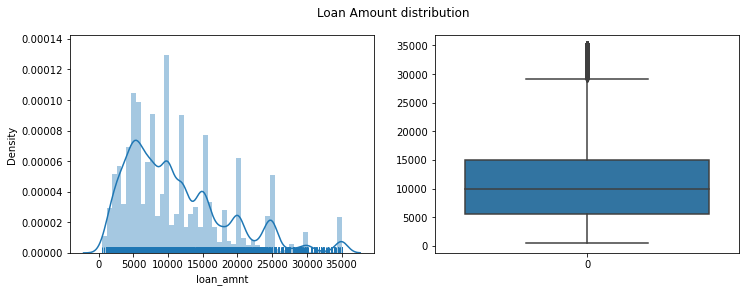

In [34]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [35]:
#Laon quantity statistics
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

#### Observations:

According to the plots above, a greater number of persons took out a loan of $10,000, and the distribution meadian is $10,000. And just a few people took out loans in excess of $30,000.

### funded_amnt_inv

At the time, the total amount committed by investors for that loan.

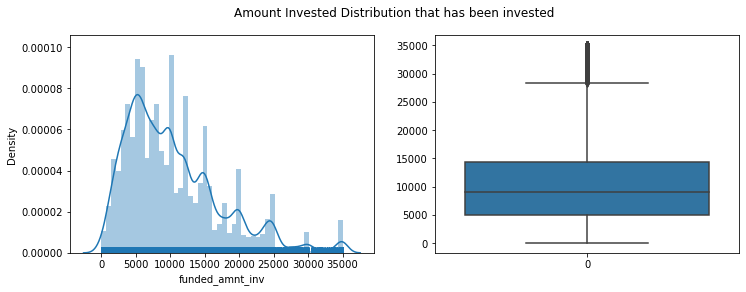

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Amount Invested Distribution that has been invested')
plt.show()

In [37]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10439.06
std      7008.52
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14350.00
90%     20000.00
95%     24655.82
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

#### Observations: 

The Funded Amount investment data acts similarly to the loan Amount data, indicating that Lending Club authorised the maximum loan amount applied for.

### Ratio of Approved Loan Amount

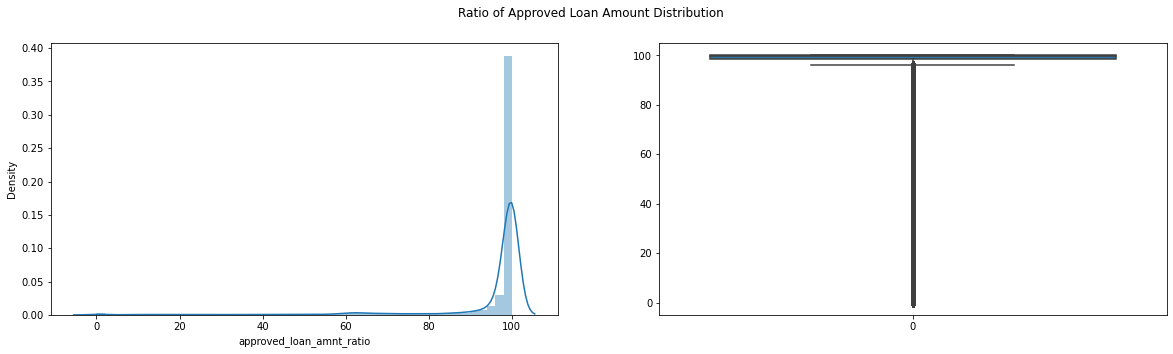

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Ratio of Approved Loan Amount Distribution')
plt.show()


#### Observations: 

Borrowers received 100% of their loan amount from investors in 70% of cases.


### Interest Rate 

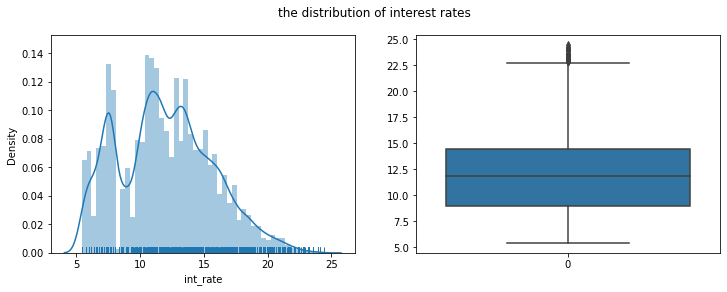

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('the distribution of interest rates')
plt.show()

#### Observations: 

We can deduce from the above two plots and interest rate information that the majority of interest rates fall between 9% and 14.5%. Some consumers took out loans with higher interest rates, such as 22.5%.

### Installment 

If the loan is originated, the monthly payment due by the borrower.



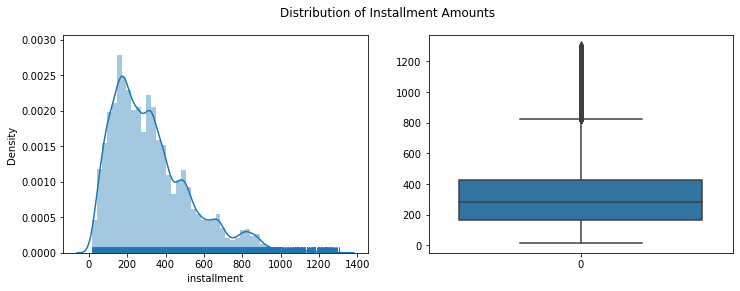

In [42]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Distribution of Installment Amounts')
plt.show()

#### Observations: 

The most common Installment amount is roughly $280.

### annual_inc 

During registration, the borrower self-reported his or her annual income.


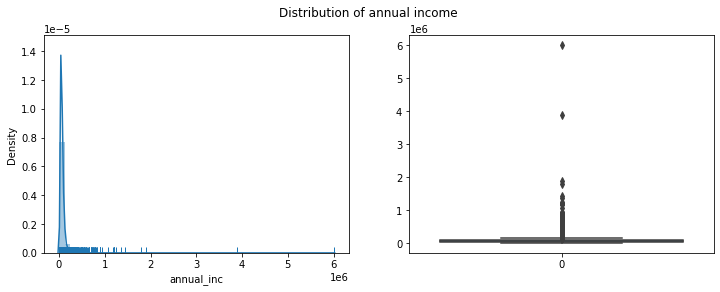

In [44]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Distribution of annual income')
plt.show()

#### Observations: 

Around 361 persons earn more than $235000 annually.

Also 99percent of the population earns less than $235000 a year.

### Ratio of Debt to Income 

A ratio determined by dividing the borrower's self-reported monthly income by the borrower's total monthly debt payments on all debt commitments, excluding the mortgage and the proposed LC loan.

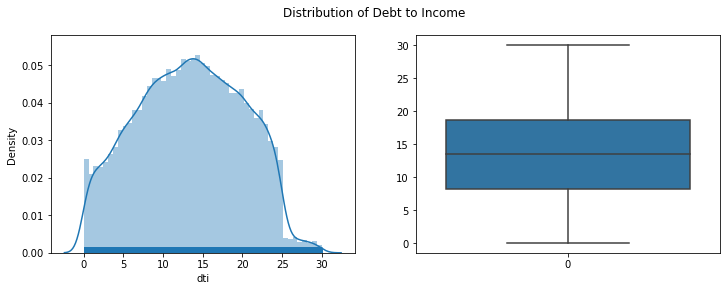

In [45]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Distribution of Debt to Income')
plt.show()

#### Observations: 

There appear to be no outliers, and the distribution closely resembles that of a normal distribution. The fact that all of the loans are issued to borrowers with a debt-to-income ratio of less than 30 is a favourable sign.

### Pub_rec (Number of derogatory public records)

Number of public recordings that are disparaging.

Text(0.5, 1.0, 'pub_rec Distribution')

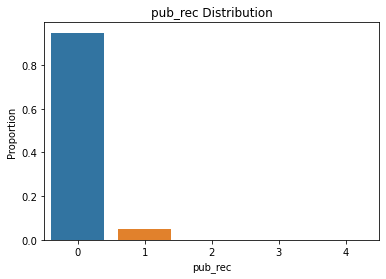

In [47]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

#### Observations: 

Approximately 90% of borrowers have no public negative records.

### pub_rec_bankruptcies
 

Number of bankruptcies on public record.

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

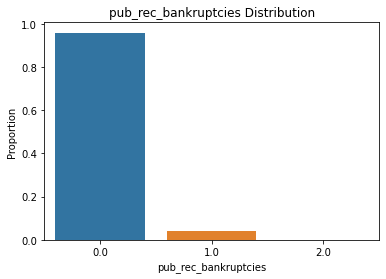

In [49]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

#### Observations: 

99% of the population has never gone bankrupt.

### Loan issue date (issue_d)

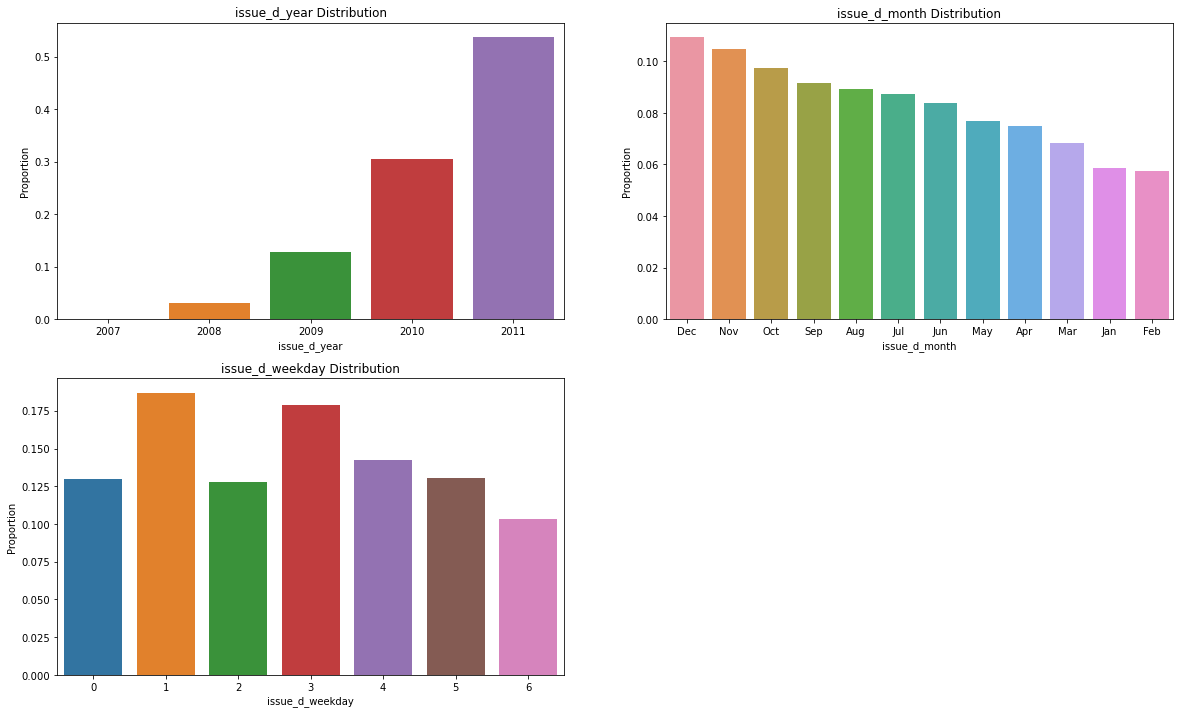

In [50]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

#### Observations:

Every year, the lending club (LC) doubles the number of loans it issues.


There have been increasing loan issues in the recent three months, including October, November, and December.

On Tuesdays and Wednesdays, LC has issued more loans than on other weekdays.

### Earliest Credit line (earliest_cr_line)

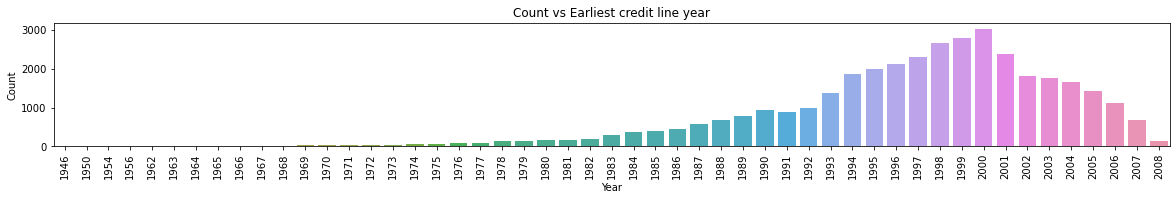

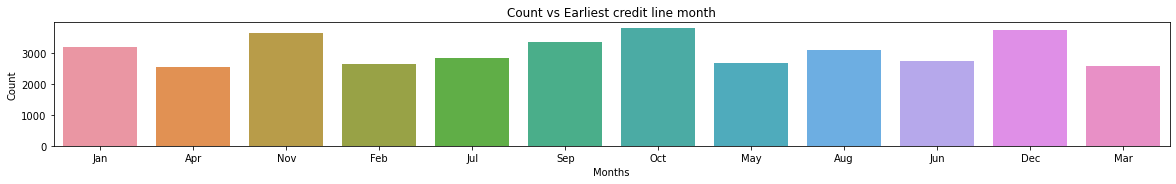

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(data.earliest_cr_line_year)
plt.title('Count vs Earliest credit line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data.earliest_cr_line_month)
plt.title('Count vs Earliest credit line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#### Observations: 

Many LC loan borrowers received an earlier credit line in the year 2000, and the majority of them received an earlier credit line at the end of the year, i.e., October, November, and December.



### Term 

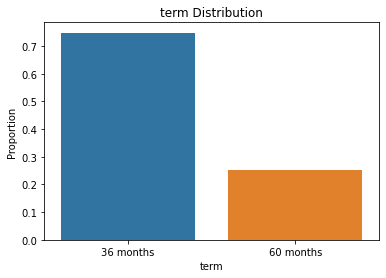

In [54]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:  

Barrowrs have a 36-month term compared to a 60-month tenure.


### Grade

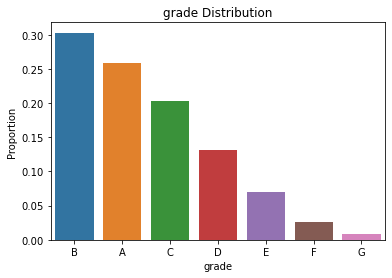

In [55]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: 

The majority of borrowers receive A and B grades before moving on to higher grades.

### Sub Grade 

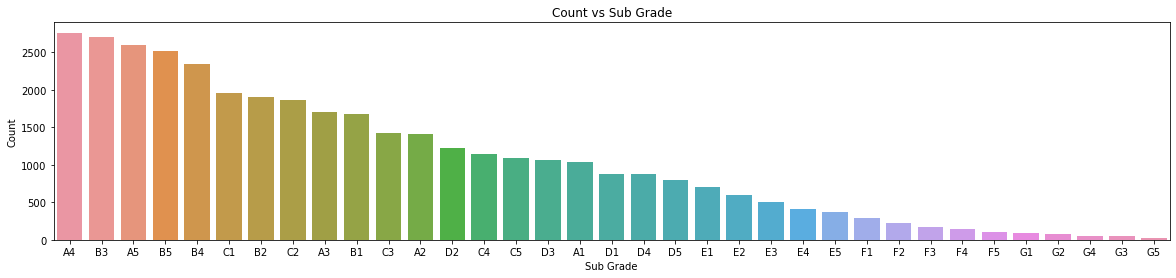

In [56]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length 

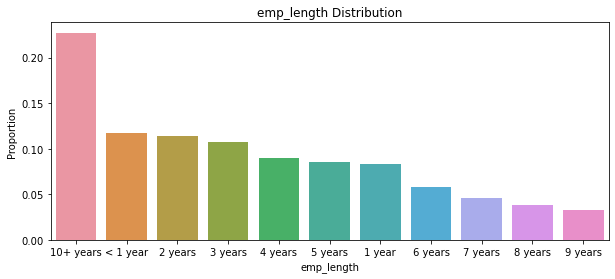

In [57]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observation: 

Borrowers are often employed for a period of 10 years or more.

### Home Ownership 

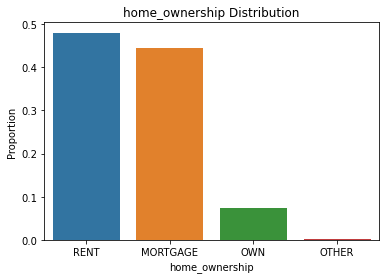

In [59]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: 

The majority of loan debtors own rented or mortgaged homes.

### Verification Status 

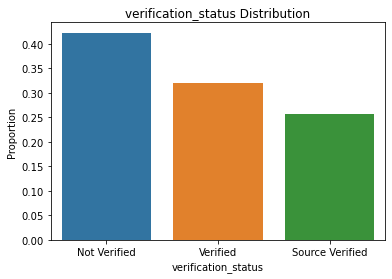

In [61]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: 

The majority of loans were granted without the applicants' income being verified.

### Loan Status 

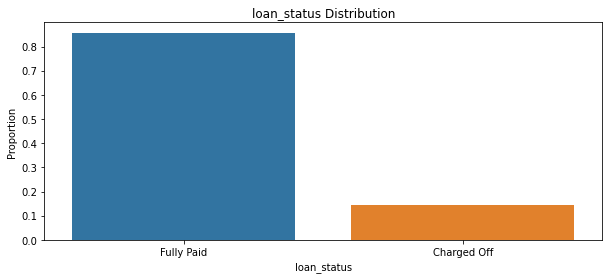

In [62]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: 

The loan has been paid in full by 85 percent of borrowers. There are 14 percent of those who have defaulted on their loans.

### Purpose 

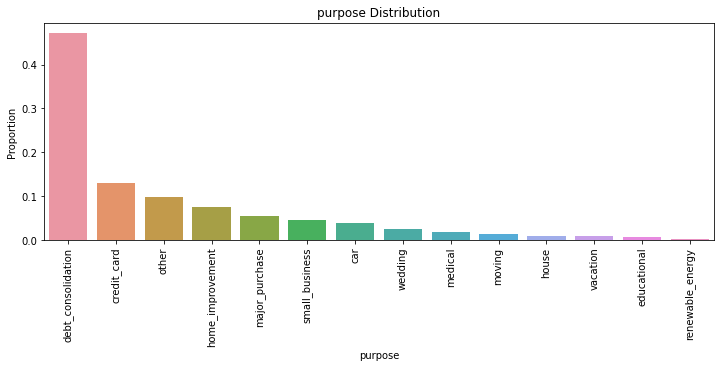

In [63]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:

It appears that a greater number of people took out loans for debt consolidation, whereas only a few people took out loans for renewable energy.

### Borrower's State (add_state)

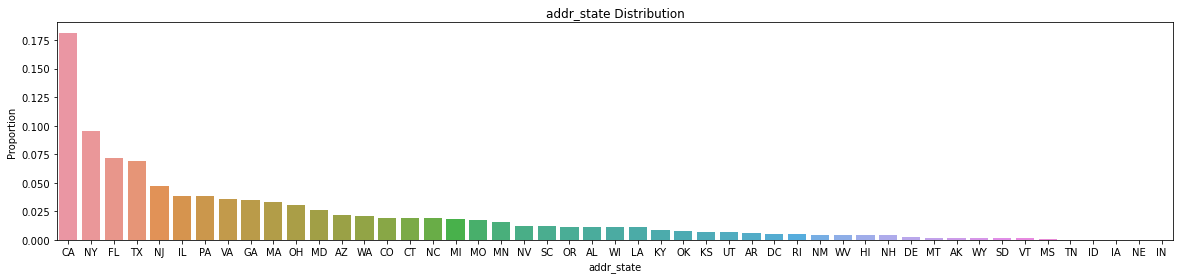

In [64]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:

The majority of the borrowers are from CA and NY.

## Segmented Univariate Analysis 

### Loan Amount 

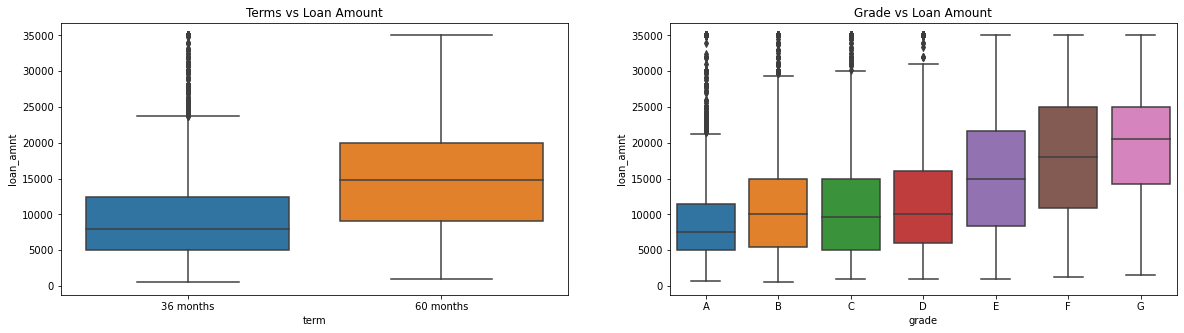

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Looking for grades in alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

#### Observations: 

Higher-value loans have a longer repayment period of 60 months.

The maximum loan amount has been taken by grades 'G' and 'H.' The loan amount grows in proportion to the decrease in grades.

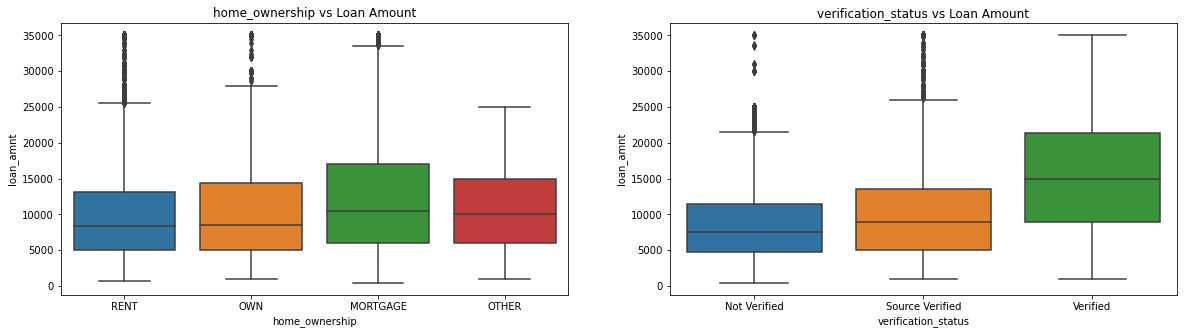

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

#### Observations: 

MORTAGE owned borrowers have a higher percentage of borrowers and a higher median loan amount.

For loans greater than $9000, the majority of borrowers are verified.

Text(0.5, 1.0, 'loan_status vs Loan Amount')

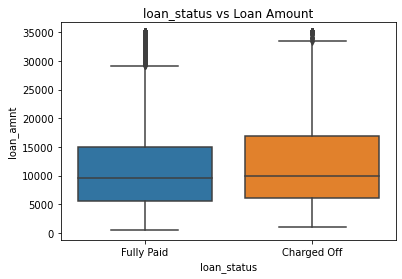

In [68]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

#### Observations: 

Charged-off debts are more expensive than fully paid loans.

Text(0.5, 1.0, 'purpose vs Loan Amount')

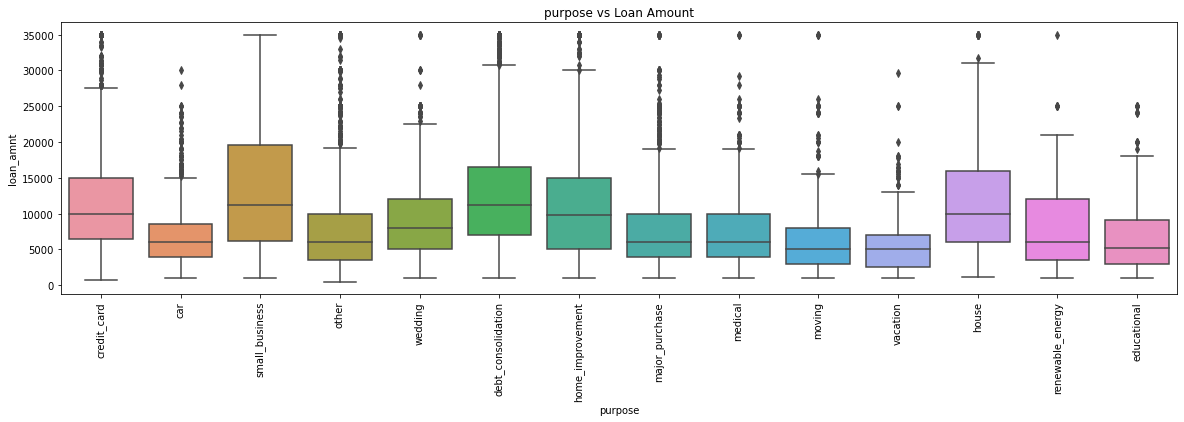

In [70]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

#### Observations: 

Small businesses receive the most loans, followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

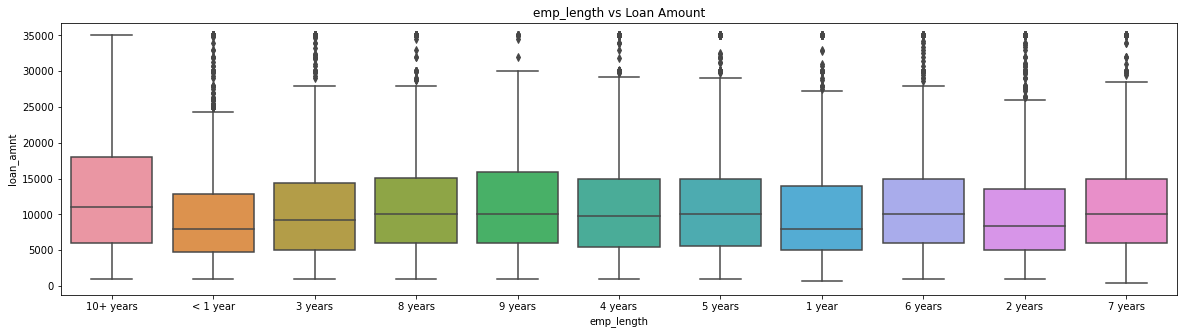

In [72]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

#### Observations: 

The majority of borrowers have been in debt for ten years or more, with the shortest term being one year.

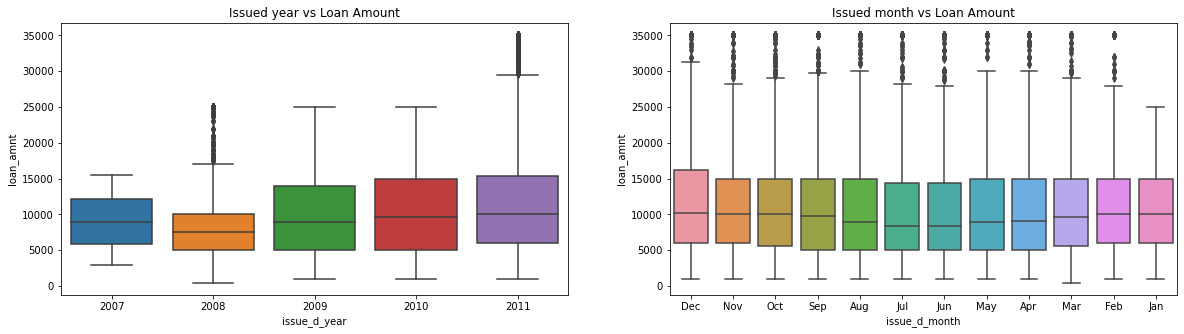

In [73]:
#Issue_d(month loan was funded)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

#### Observations: 

The average loan amount per year did not change significantly, but the distribution became more spread as the years progressed, indicating that people took varied loan amounts each year.


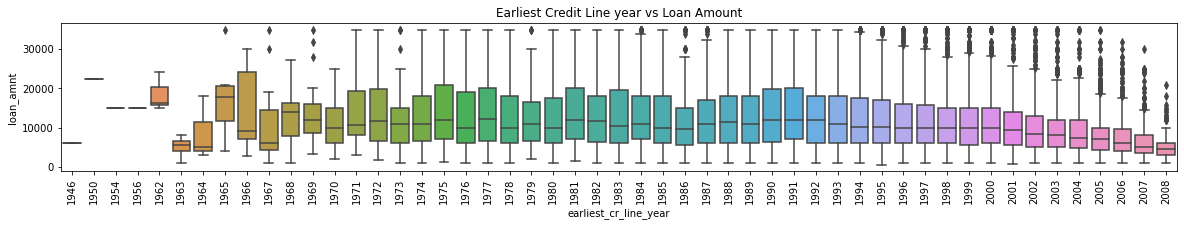

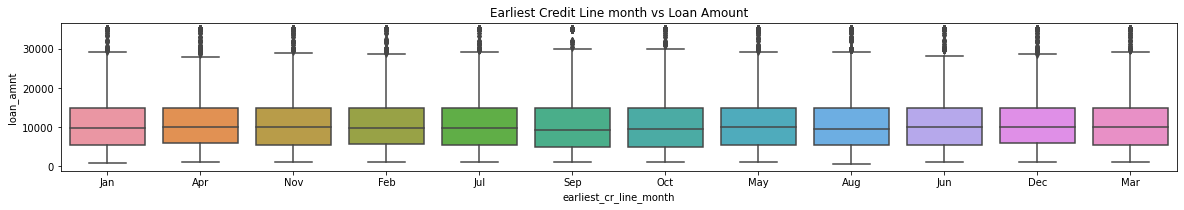

In [74]:
#earliest_cr_line(The month the borrower's earliest reported credit line was opened)
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

#### Observations: 

Borrowers who took out the first credit line in 1966 received a larger range of loans than others.

### funded_amnt(total amount committed to loan) 

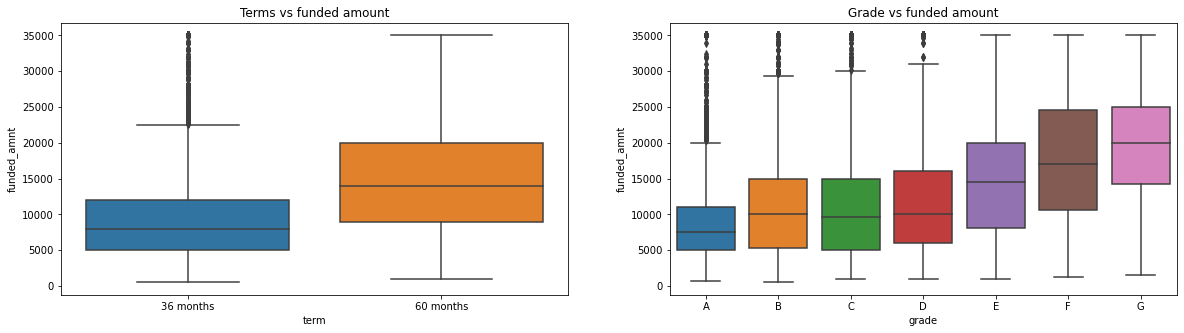

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

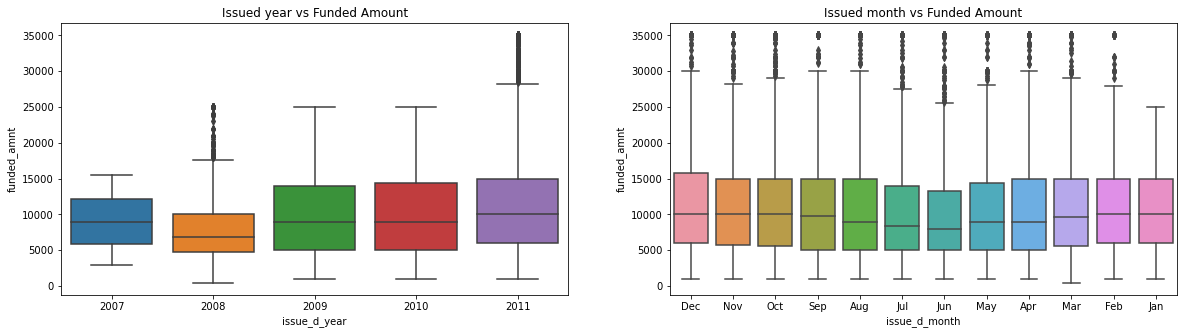

In [76]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()


Text(0.5, 1.0, 'loan_status vs Funded amnt')

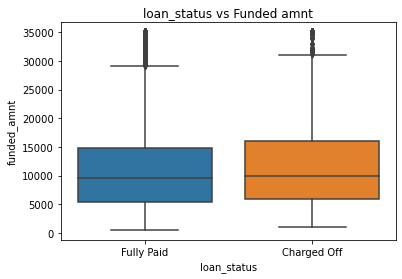

In [77]:
#loan status vs Funded amount
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'purpose vs funded amount')

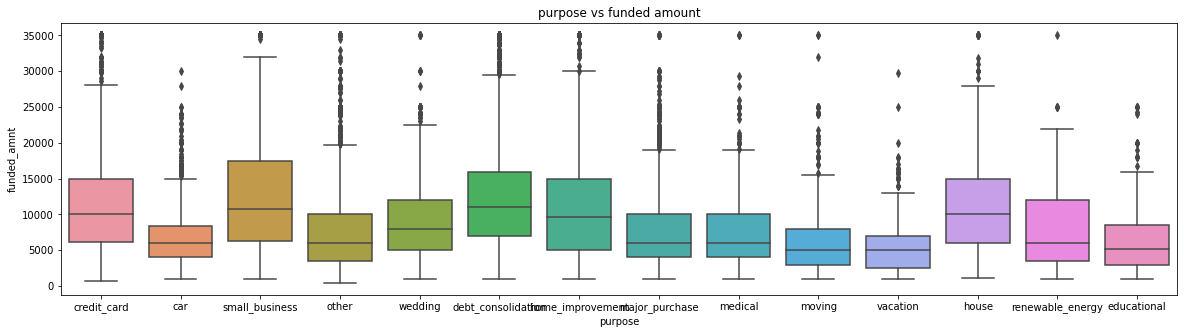

In [78]:
#Purpose vs Funded amount
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')

Text(0.5, 1.0, 'emp_length vs funded amount')

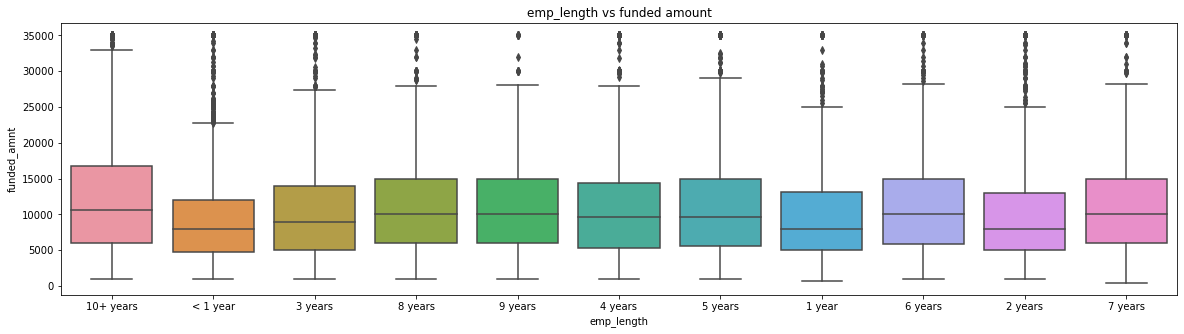

In [79]:
#Employment length vs funded amount
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

#### Observations: 

The observations of the Funded Amount are identical to those of the Loan Amount.

### int_rate(Interest Rate ) 

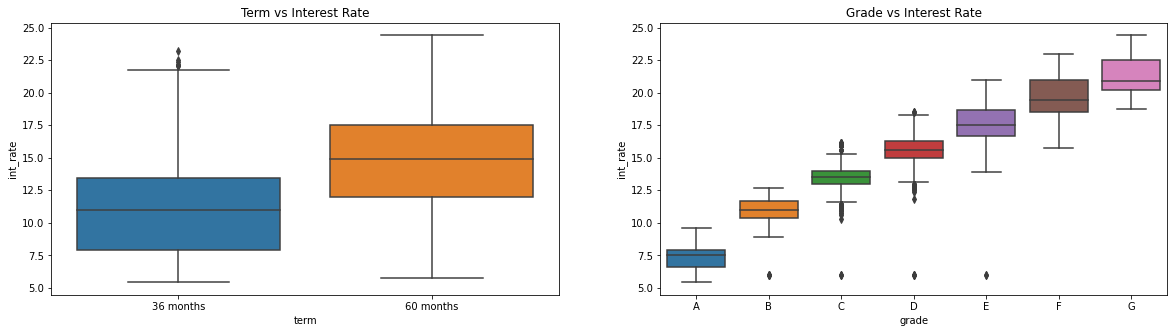

In [81]:
#Term vs. Interest Rate in comparison to Grade vs. Interest Rate
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

#### Observation: 

The interest rates for longer-term loans are greater.

In addition, when grades decline, interest rates are rising (A to G).

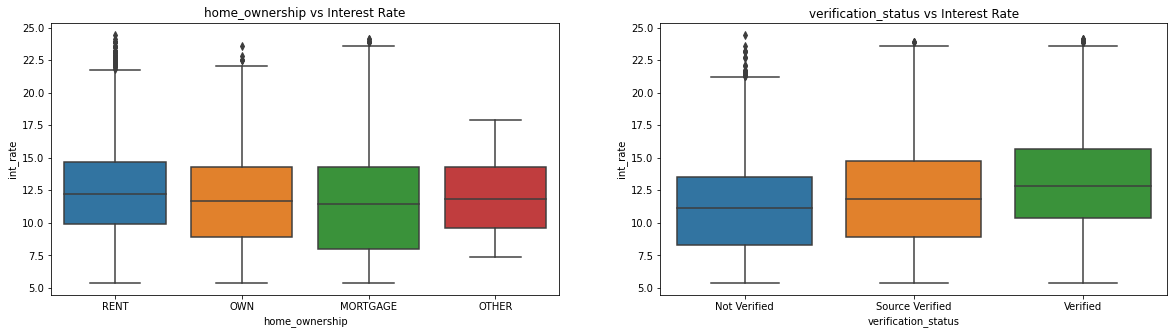

In [82]:
#home_ownership vs Interest Rate in comparison to verification_status vs Interest Rate.
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

#### Observations: 

Barrowers who own a home and have a mortgage were able to get loans with lower interest rates since they have security.

In comparison to Verified and Source Verified Barrowers, Non Verified Barrowers received lower interest rates.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

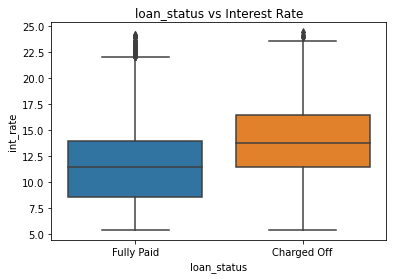

In [85]:
#loan status vs Interest Rate
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

#### Observations: 

This clearly indicates that the higher the interest rate, the greater the risk of defaulting on the loan.

Text(0.5, 1.0, 'purpose vs Interest Rate')

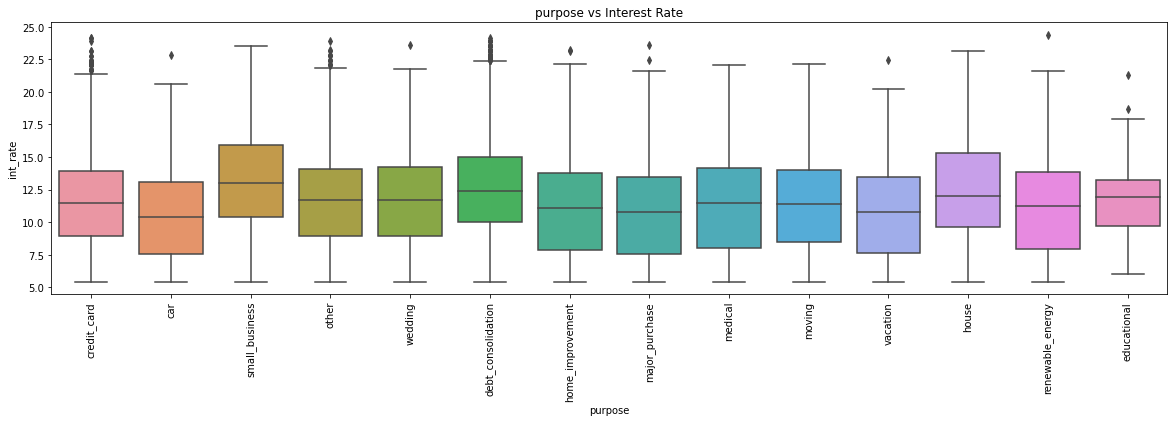

In [86]:
#Purpose vs Interest Rate
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

#### Observations: 

Small business, debt consolidation, and home loans have higher interest rates than other types of loans.

Text(0.5, 1.0, 'emp_length vs Interest Rate')

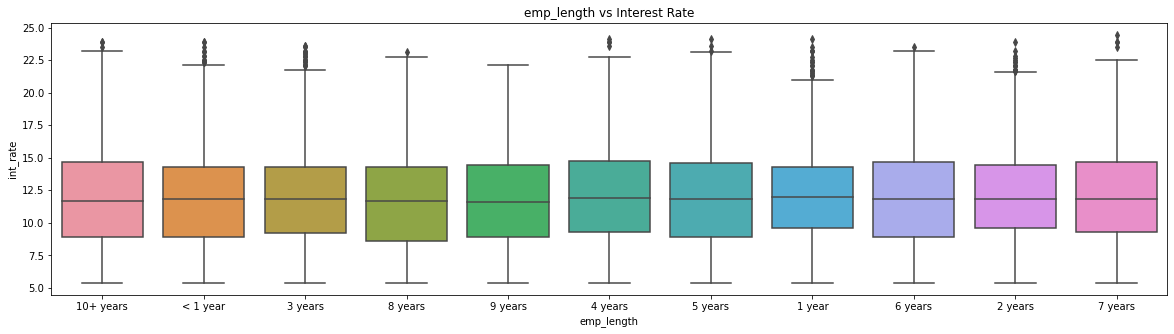

In [88]:
#Employment length vs Interest Rate
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('emp_length vs Interest Rate')

#### Observations: 

It appears that the length of employment has little bearing on the interest rate.

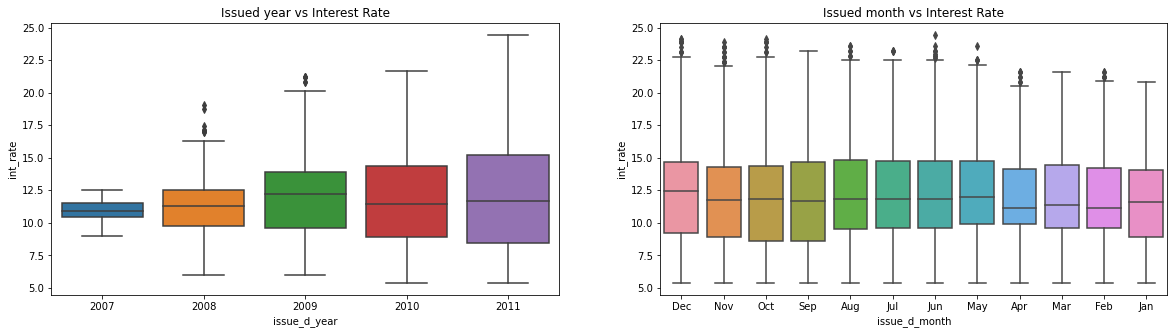

In [89]:
#Issue_d(month loan was funded)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued month vs Interest Rate')
plt.show()

#### Observations: 

As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.



### annual_inc 

The self-reported annual income provided by the borrower during registration.

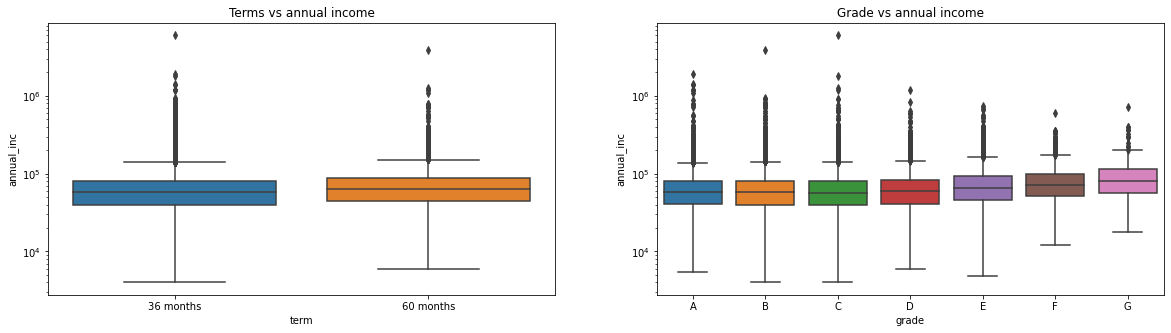

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
#Grade vs annual income comparison 
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

#### Observations: 

Lower grades have a larger annual income than higher grades.

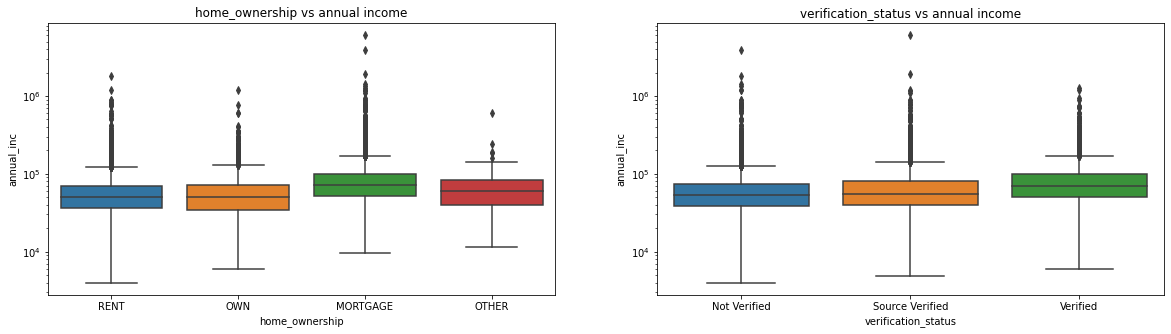

In [92]:
#home_ownership vs annual income in comparison to verification_status vs annual income.
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

#### Observations: 

MORTAGE has a larger income due to property ownership.

For most of the borrowers with greater annual salaries, the source of income was verified.

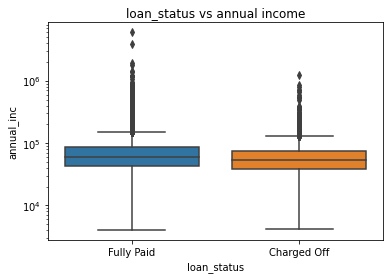

In [93]:
#loan status vs annual income
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

#### Observations: 

Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.



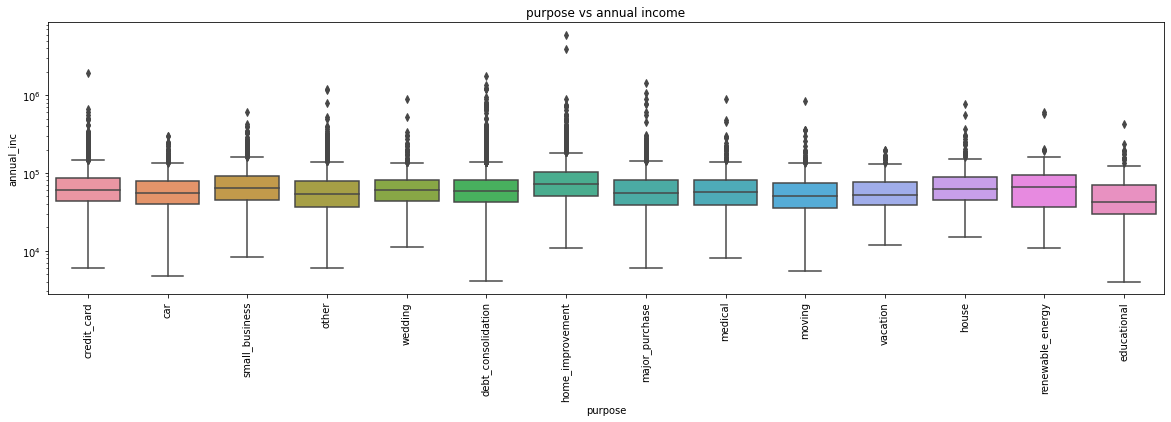

In [94]:
#Purpose vs Annual income
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

#### Observations:

A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

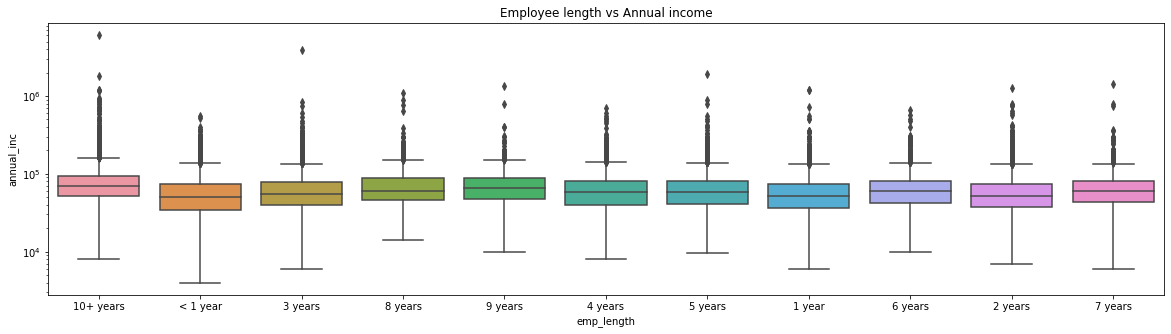

In [95]:
#Employee length vs Annual income
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

#### Observations:

Borrowers with higher incomes have taken out loans for ten years or more.

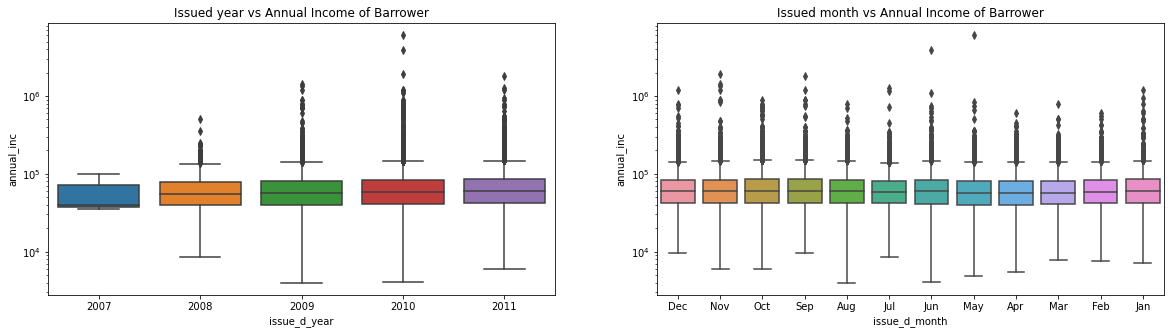

In [96]:
#Issue_d(month loan was funded)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.annual_inc, data=data)
#Issued year vs Annual Income of Barrower in comparioson to Issued month vs Annual Income of Barrower.
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

#### Observations:

The month the loan was funded has no bearing on annual revenue.

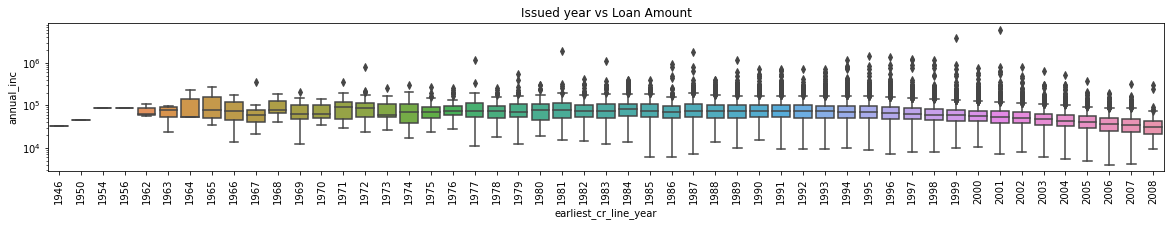

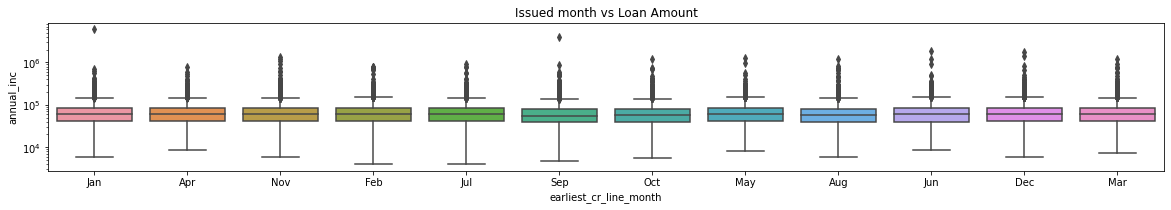

In [98]:
#earliest_cr_line(The month the borrower's earliest reported credit line was opened)
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#putting y values on a log scale for better analysis
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

#### Observations:

The annual revenue and the earliest Credit line year and month show no discernible pattern.

### Debt to Income Ratio 

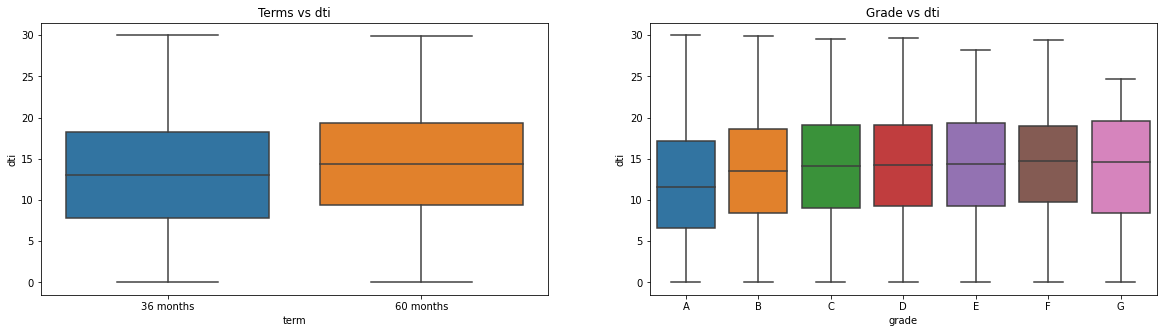

In [99]:
#DTI(Debt to income)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

#### Observation:

For persons with a longer tenure, such as 60 months, the Debt to income is a little higher.



The DTI of A Grade barrowers is lower than that of other grades. For a high repayment percentage, the Debt to income should be low.

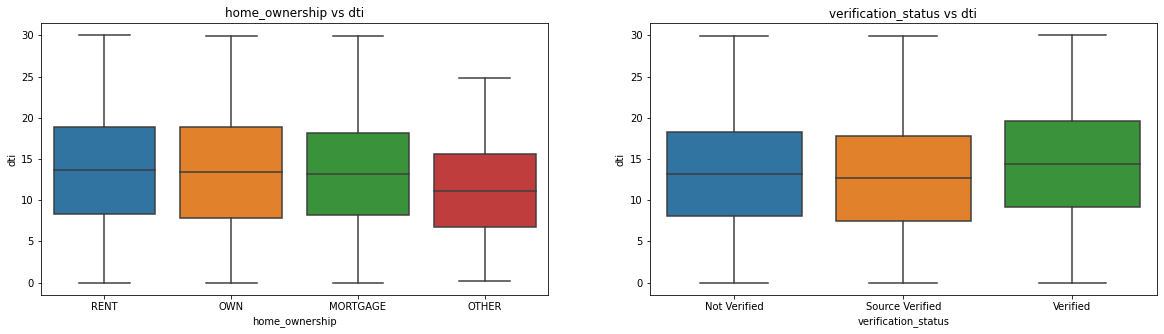

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)

#### Observations:

People who own a home in another state have a lower debt to income than those who own a home in the United States. This could be due to the fact that other people have mortgages and property loans.

Text(0.5, 1.0, 'loan_status vs dti')

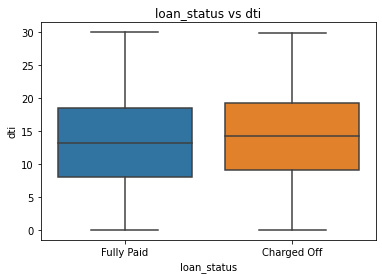

In [101]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

#### Observations:

Borrowers with a high debt to income are more likely to default.

Text(0.5, 1.0, 'purpose vs dti')

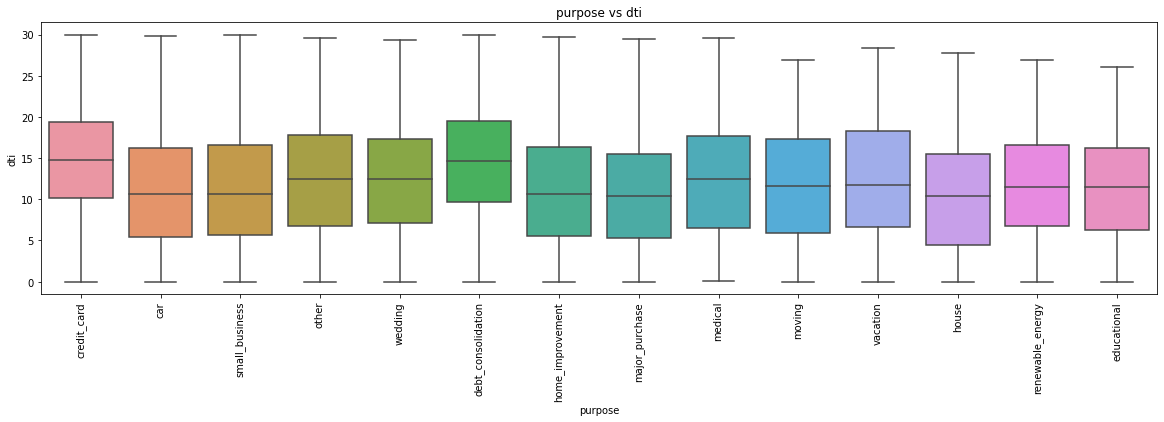

In [102]:
#Purpose vs Debt to income 
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

#### Observations:

People who took out loans for credit cards and debt consolidation have a higher 'debt to income' than those who took out loans for other reasons.

Text(0.5, 1.0, 'emp_length vs dti')

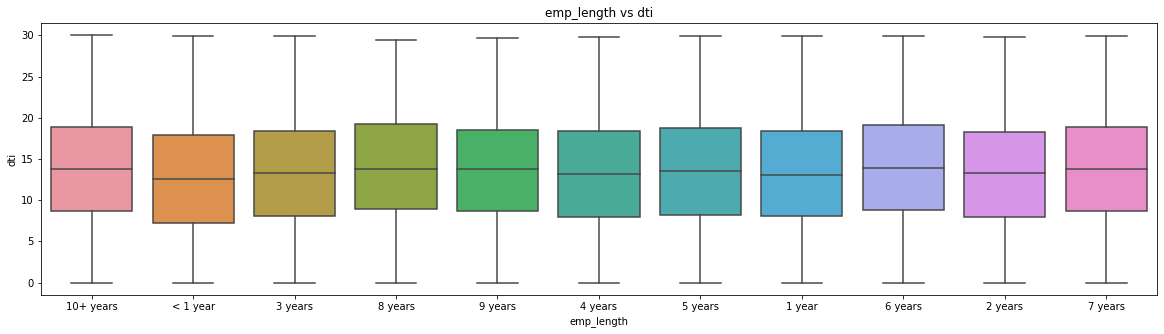

In [103]:
#Employment length vs debt to income
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')

#### Observations: 

For barrowers of different lengths of work, the debt to income is very comparable.


## pub_rec 

Number of derogatory public records.



In [105]:
#Finding the proportion of values in each category's value
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

pub_rec       term     id  proportion
0        0  36 months  26152        0.75
1        0  60 months   8719        0.25
2        1  36 months   1349        0.72
3        1  60 months    526        0.28
4        2  36 months     36        0.80
5        2  60 months      9        0.20
6        3  36 months      7        1.00
7        4  36 months      2        1.00

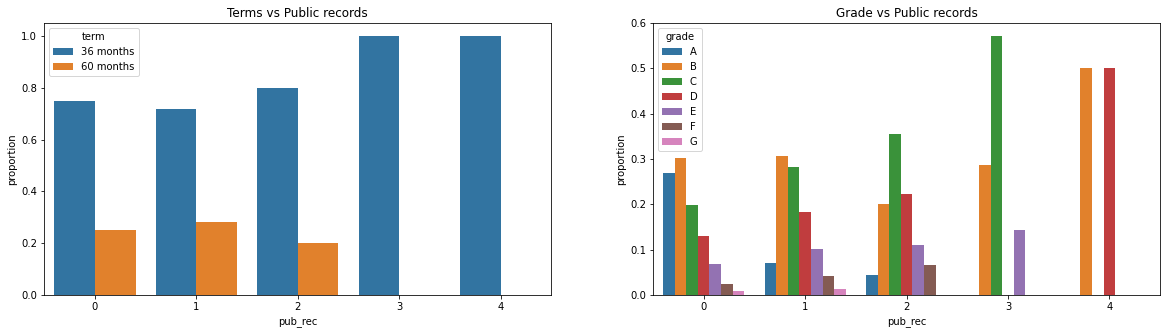

In [106]:
#Terms vs Public records in comparion to Grade vs Public records
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

#### Observations:

Borrowers with more public unfavourable records were given loans for 36 months, while those with less public adverse records were given loans for 80 percent and 20 percent of the time, respectively, between 36 months and 60 months.

We can see that the grades have a consistent trend. People in A grades have fewer unfavourable records than those in lower grades.

People with exceptional C, D, and E grades have high pub_recs.

Text(0.5, 1.0, 'Verification status vs Public records')

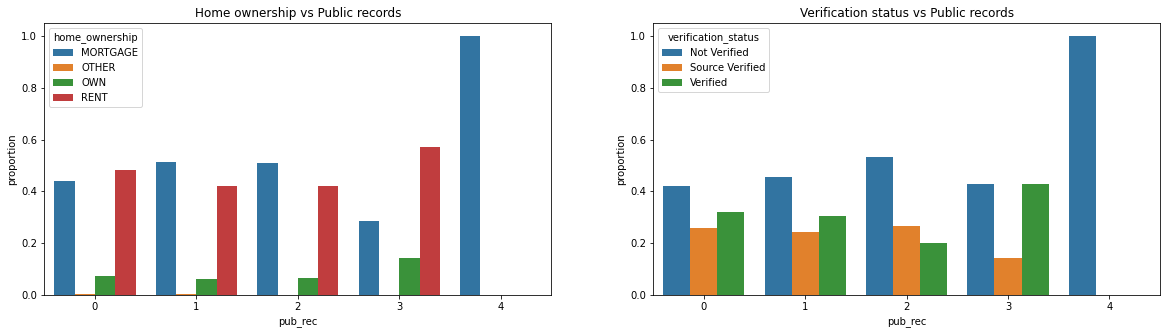

In [107]:
plt.figure(figsize=(20,5))
plt.subplot(121)

#Home ownership vs Public records in comparison to Verification status vs Public records.
df = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

#### Observations:
 

Borrowers with four public derogatory records are at the top of the mortgage owned house category, as well as the Not confirmed verification status category.

Text(0.5, 0.98, 'loan status vs Public records')

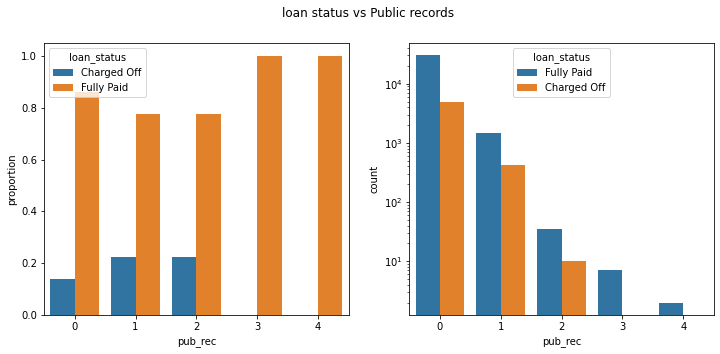

In [108]:
#Proportion of each category's values
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

#### Observations: 

There is a rise in deafulted loans for those with bad credit from 0 to 2, but not for pub rec 3 and 4, which is due to the fact that relatively few people took out loans in those pub rec numbers, as most borrowers are in the 0 pub rec group.

Text(0.5, 1.0, 'Purpose vs Public records')

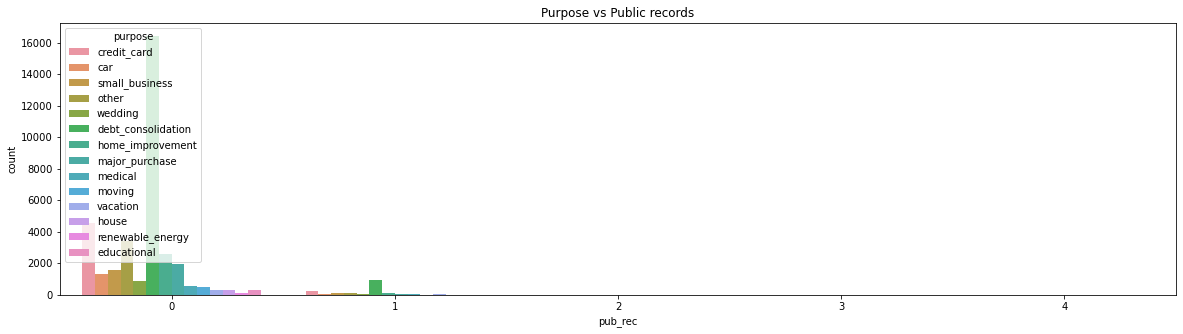

In [109]:
#Purpose vs Public records
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='purpose', data=data)
plt.title('Purpose vs Public records')

Text(0.5, 1.0, 'Employee length vs Public records')

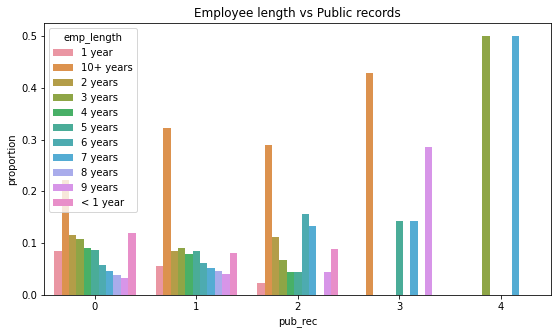

In [110]:
plt.figure(figsize=(20,5))
#Proportion of each category's values
df = data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

## pub_rec_bankruptcies

Number of public record bankruptcies.

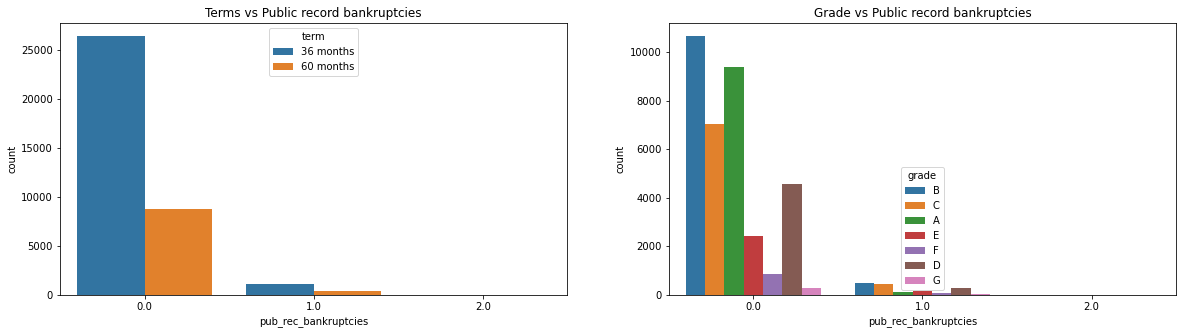

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
#Terms vs Public record bankruptcies in comparison to Grade vs Public record bankruptcies.
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)

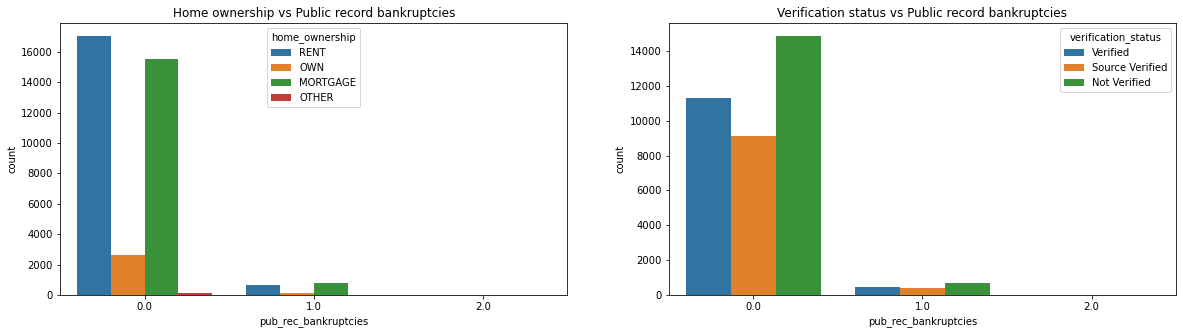

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
#Home ownership vs Public record bankruptcies in comparison to Verification status vs Public record bankruptcies.
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

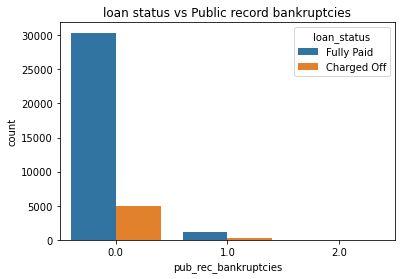

In [114]:
#loan status vs Public record bankruptcies
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

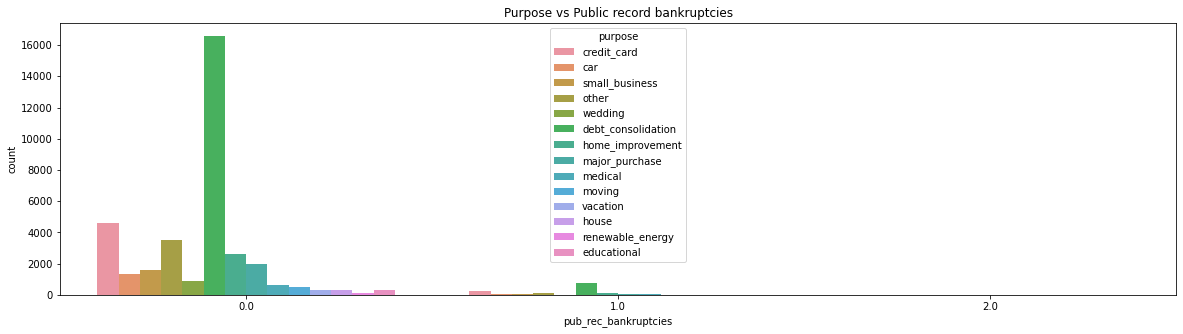

In [115]:
#Purpose vs Public record bankruptcies
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

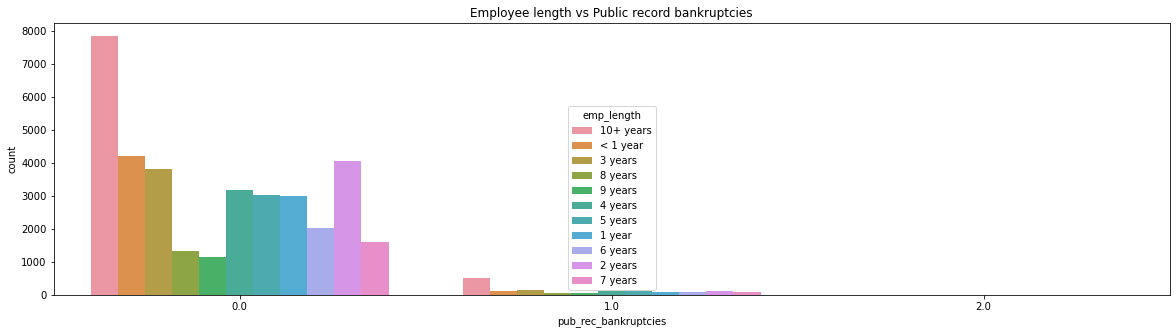

In [116]:
#Employee length vs Public record bankruptcies
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

## inq_last_6mths 

The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

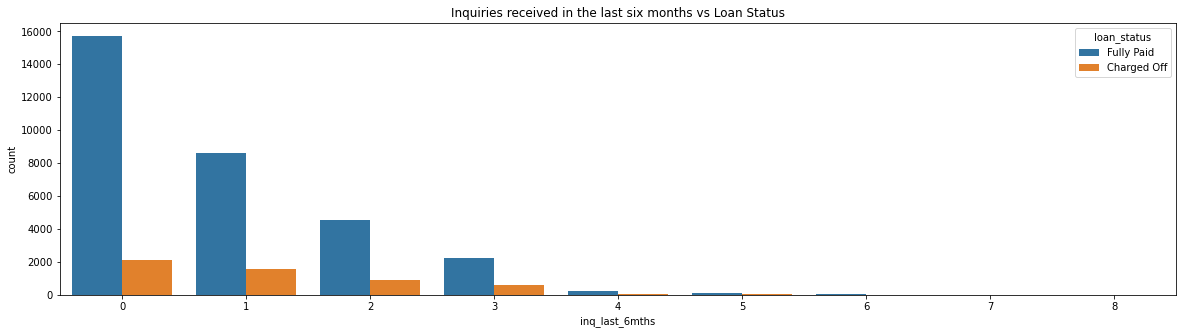

In [117]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('Inquiries received in the last six months vs Loan Status')
plt.show()

## Ratio of Approval to Loan Amount

Text(0.5, 1.0, 'employement length vs Approval Loan Amount Ratio')

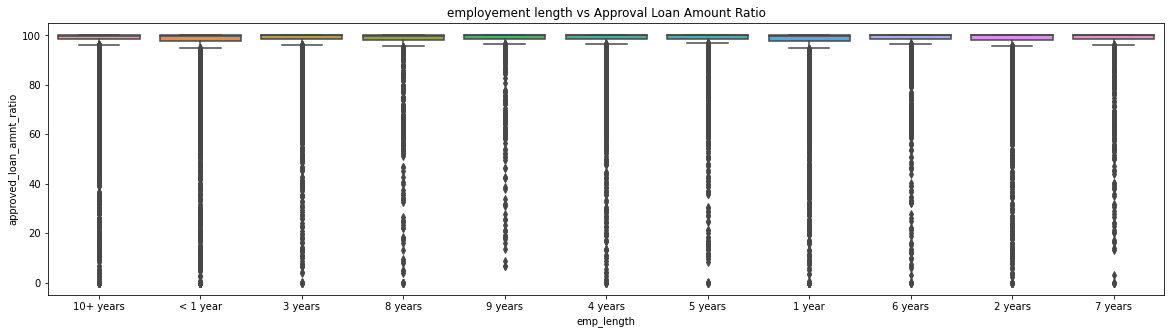

In [118]:
#employement length vs Approval Loan Amount Ratio
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.approved_loan_amnt_ratio, data=data)
plt.title('employement length vs Approval Loan Amount Ratio')

#### Observations;

The approval of loan amount ratio and the length of employment have no correlation.

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

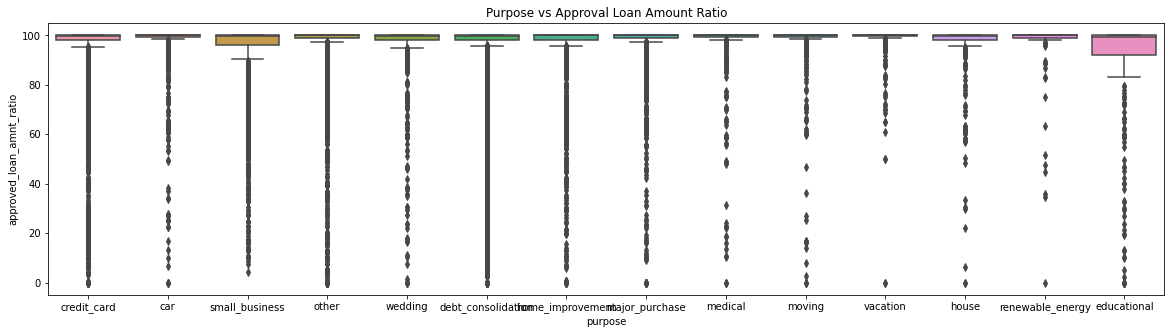

In [119]:
#Purpose vs approval loan amount ratio
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Purpose vs Approval Loan Amount Ratio')

#### Observations:

The amount invested by investors is less than the desired loan amount for education and small company.

Text(0.5, 1.0, 'Homeownership versus. Loan Amount Approval Ratio')

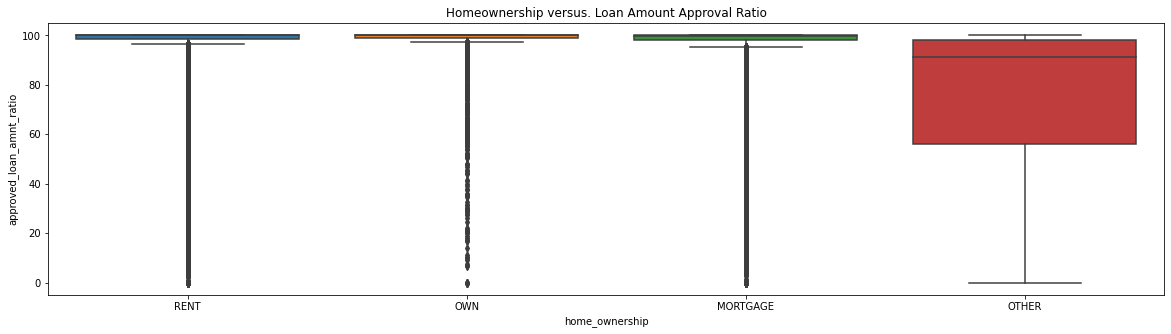

In [121]:
#Homeownership versus. Loan Amount Approval Ratio
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Homeownership versus. Loan Amount Approval Ratio')

#### Observations:

Borrowers who own other homes have a lower approved ratio, which means they received less money than they requested.

# Bivariate Analysis

### Term vs Loan Status 

Text(0.5, 1.0, 'Term vs Loan status')

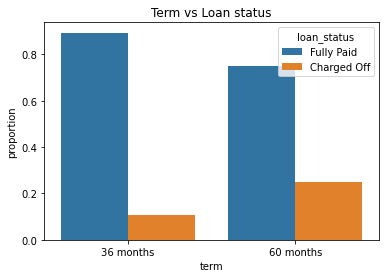

In [123]:
#Proportion of each category's values
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

#### Observations:

It appears that borrowers defaulted on their loans at a higher rate in the 60-month period than in the 36-month period. In addition, the Fully Paid rate is greater after 36 months.

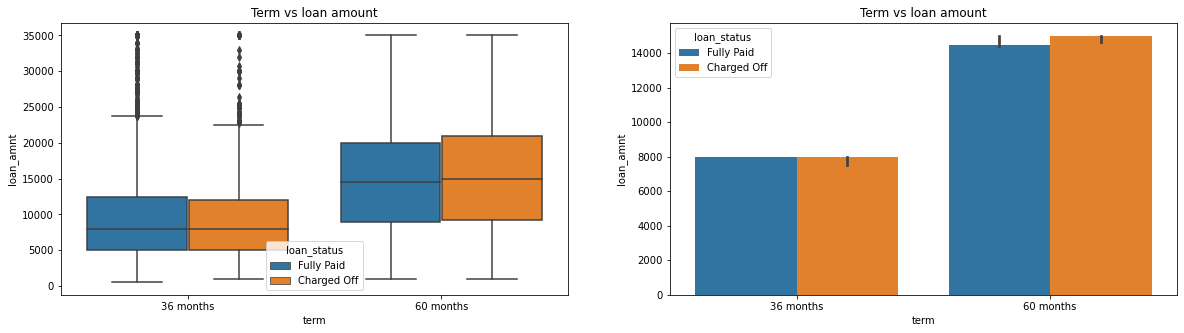

In [124]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

#### Observations: 

In both 36 months and 60 months, the loan amount is not a deciding factor in defaults.

Borrowers are equally distributed in default and non-default situations for 36 and 60 month terms.

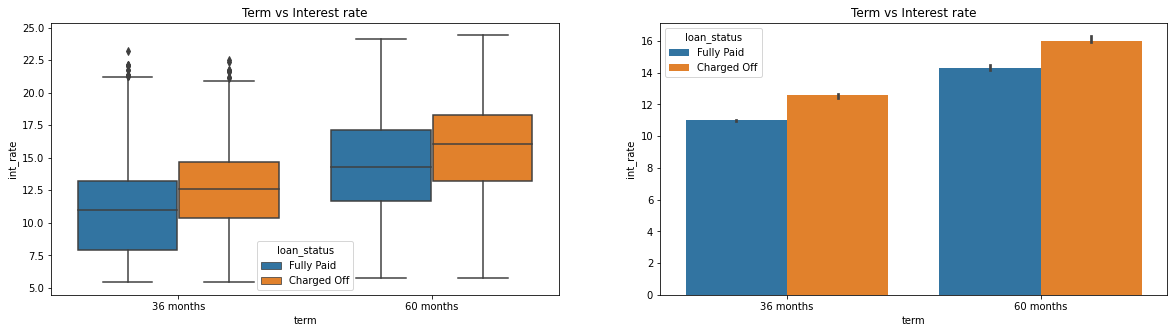

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

#### Observations;

The deafult rate is higher in both 36 and 60 months tenure with higher interest rates.

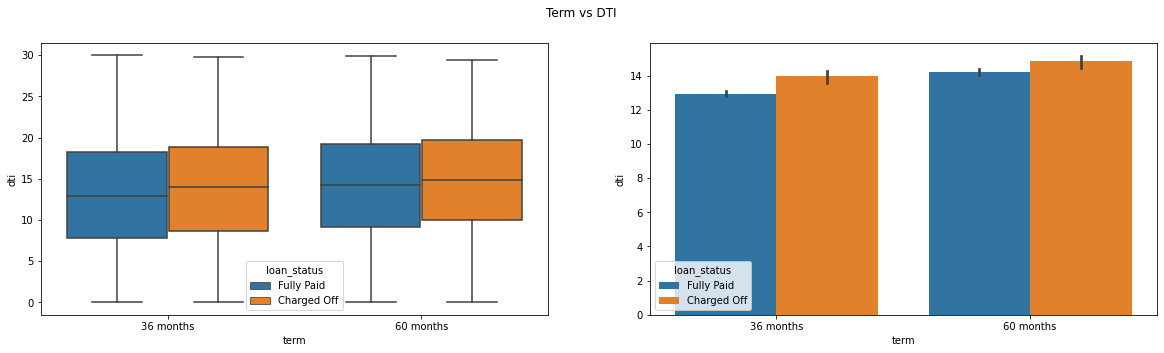

In [131]:
#Term vs DTI(debt to income)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

#### Observations:

When it comes to the Debit to Income ratio, charge-offs are larger than fully-paid.

### Grade 

In [133]:
#From A to G, Sorting Grades
grade_ord = data.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

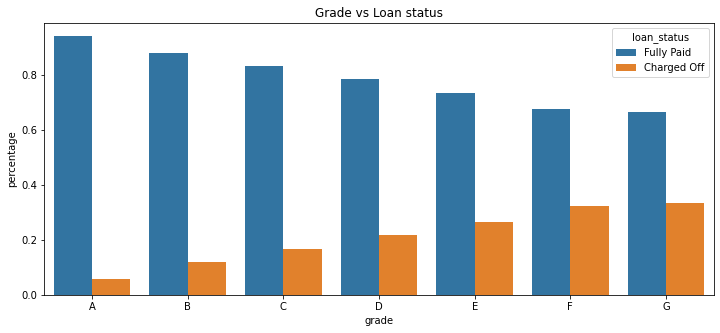

In [134]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

#### Observations:

The Charged off increases as grades decline, as shown on the graph above.

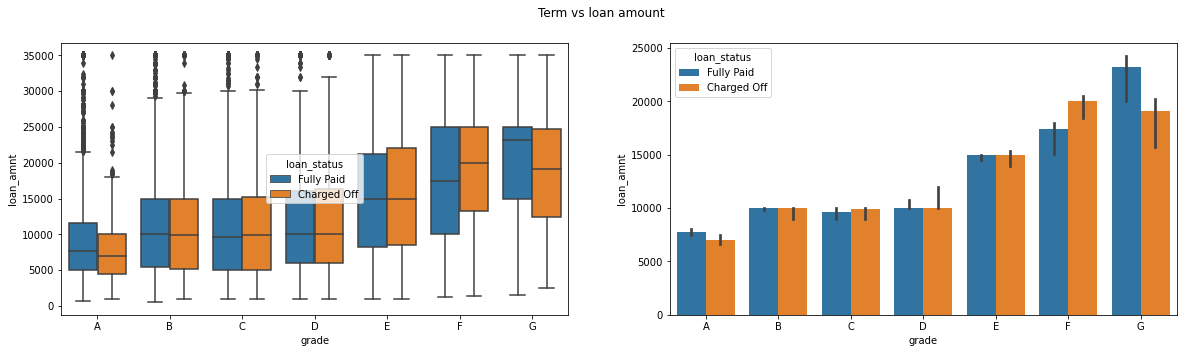

In [135]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

#### Observations:

The gap between charged-off and fully paid is greater for lower grades 'F' and 'G.'

Lower-income persons have taken out more loans and are also more likely to default on them.

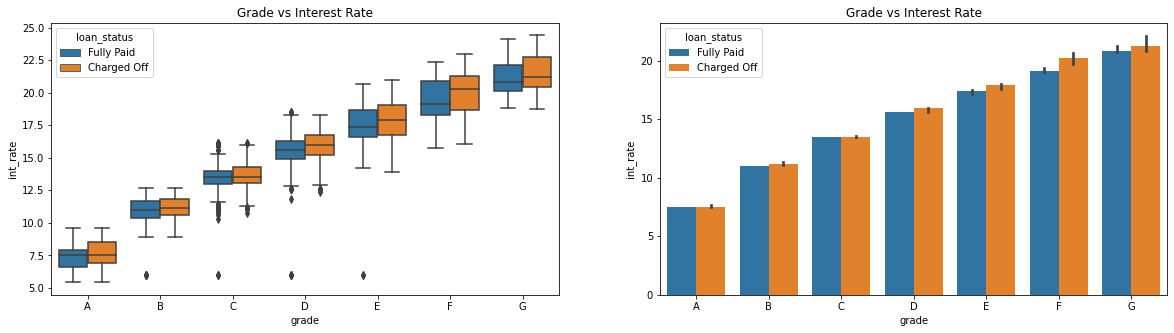

In [138]:
#Grade vs Interest rate of the approved loan
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

#### Observations:
 

The interest rate gradually rises as the grade falls. They are becoming increasingly prone to defaulting on their loans.

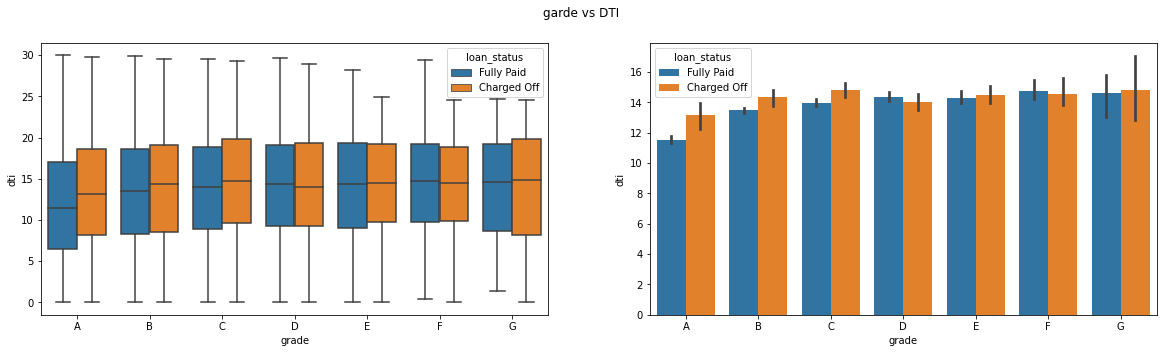

In [139]:
#Grade vs Debt to income
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

#### Observations:

In each grade and loan status, the dti does not change significantly.

### Employment Length 

Text(0.5, 1.0, 'Grade vs Loan status')

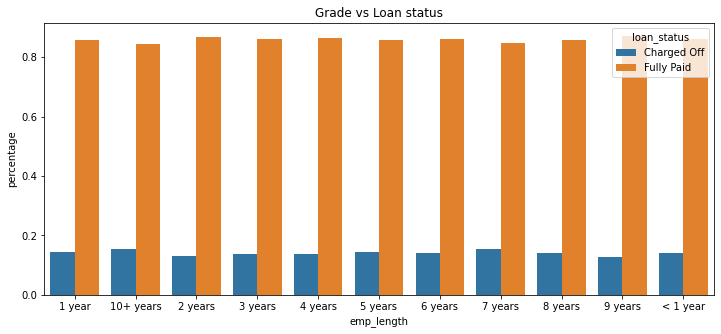

In [141]:
#Grade vs Loan status 
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

#### Observations:

Across job lengths, no significant variations or patterns in defaulters have been detected.

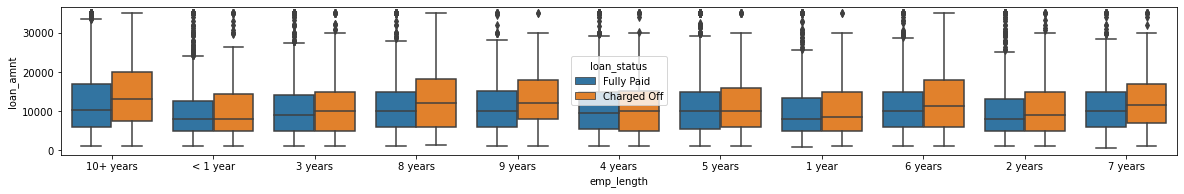

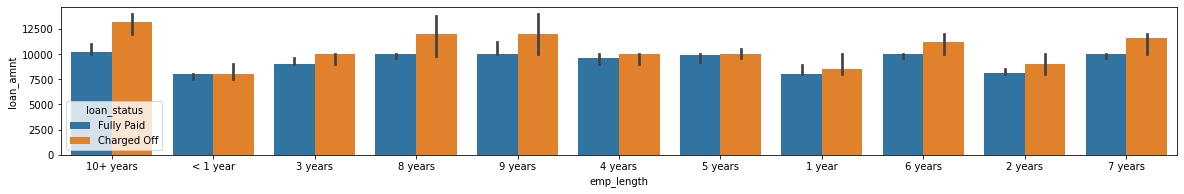

In [143]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

#### Observations: 

Borrowers who worked for longer periods of time and took out larger loans had a greater rate of default.

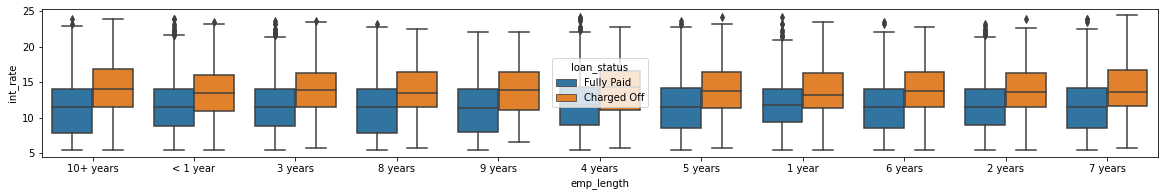

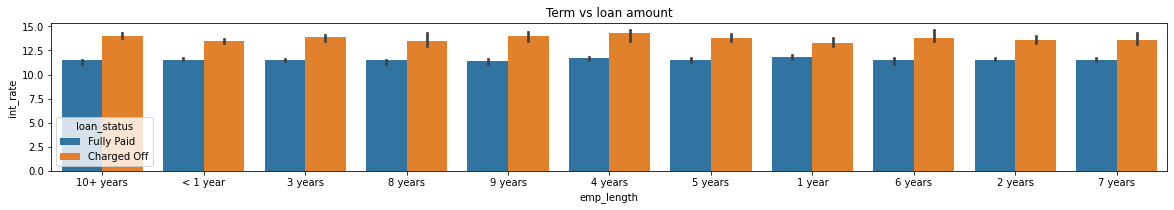

In [145]:
#Term vs loan amount
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

#### Observations:

Loans with higher interest rates, regardless of length of employment, were defaulted on more frequently.

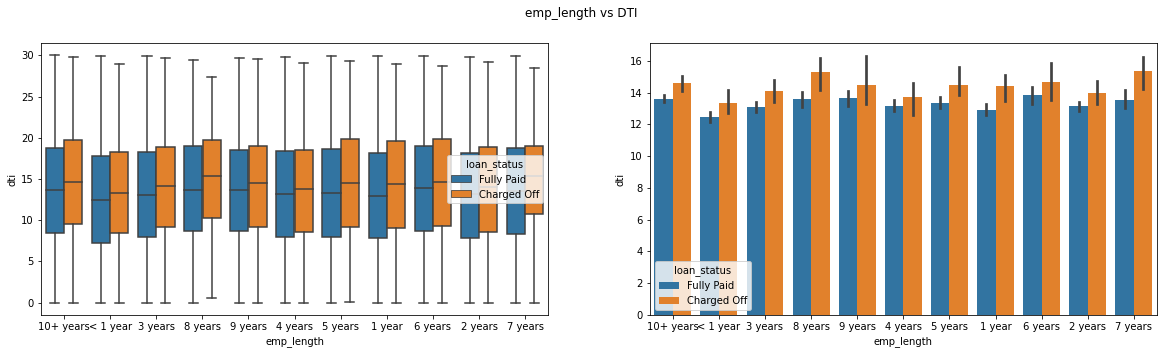

In [146]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

#### Observations:

There are no patterns in employment length or DTI that point to defaults.

### Homeownership 

Text(0.5, 1.0, 'Home Ownership vs Loan status')

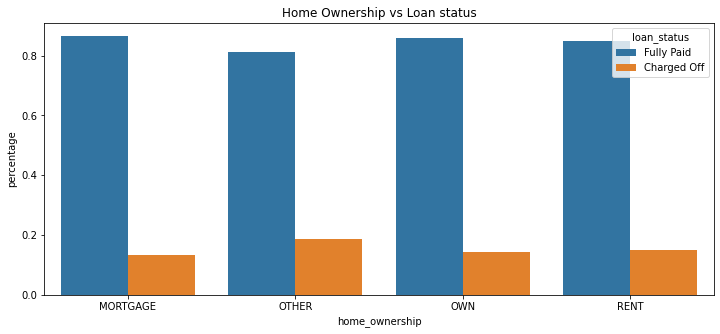

In [147]:
#Homeownership vs Loan status
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

#### Observations:

In other property ownership categories, there is a rather high percentage of defaults.

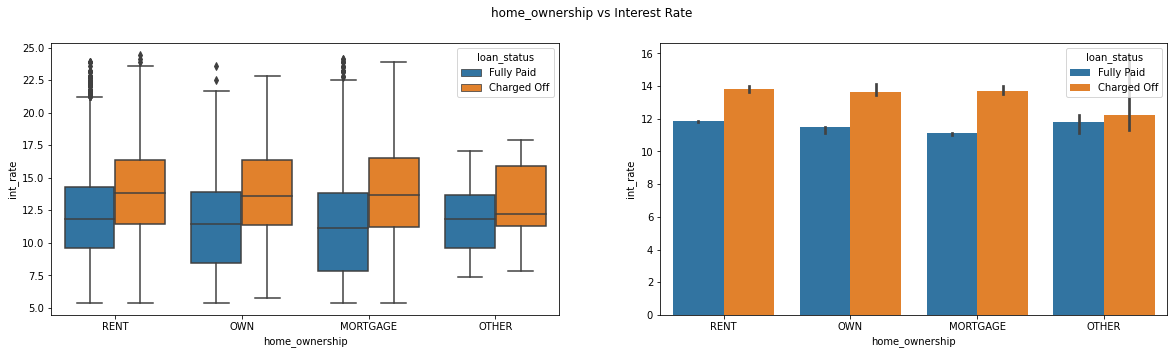

In [149]:
#Homeownership vs Interest Rate
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

#### Observations: 

Regardless of home ownership, when the interest rate is high, so is the default rate.

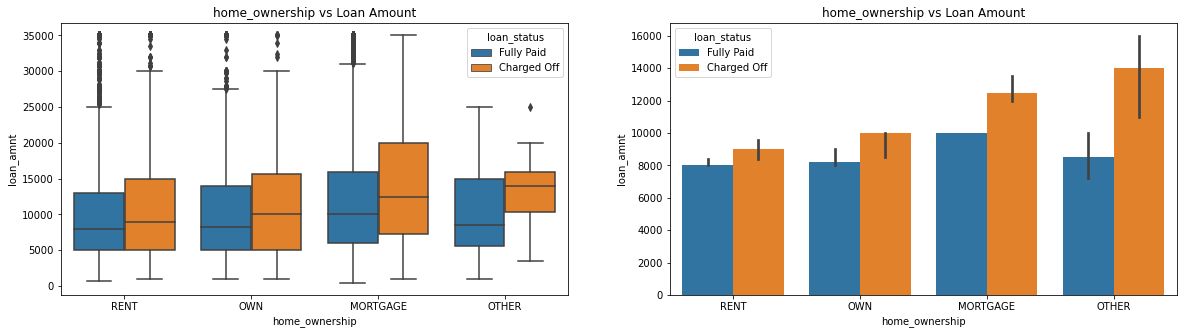

In [151]:
#Homeownership vs Loan Amount
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()


#### Observations:


Borrowers who took higher loan amounts defaulted more than others.



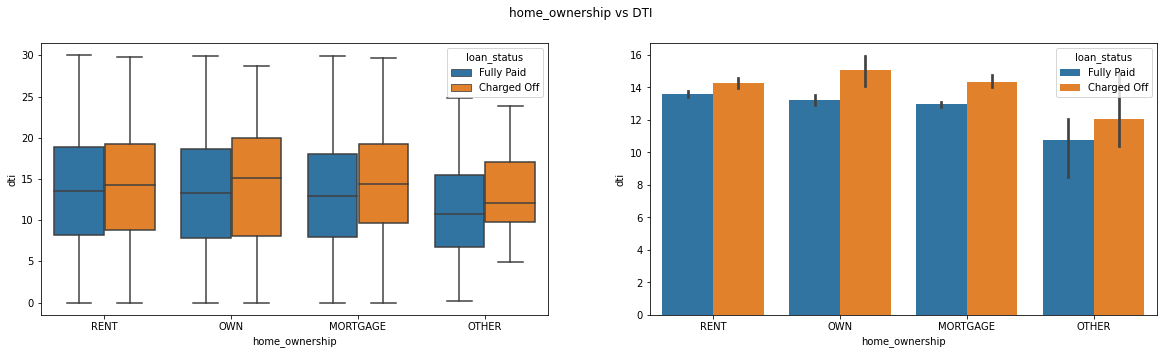

In [152]:
#Homeownership vs dt to income(DTI)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

#### Observations:

Borrowers in the other home ownership group had a lower debt-to-income ratio than those in other categories.

Homeowners have an equal chance of failing on all of their mortgages.

## Address State 

The state provided by the borrower in the loan application.

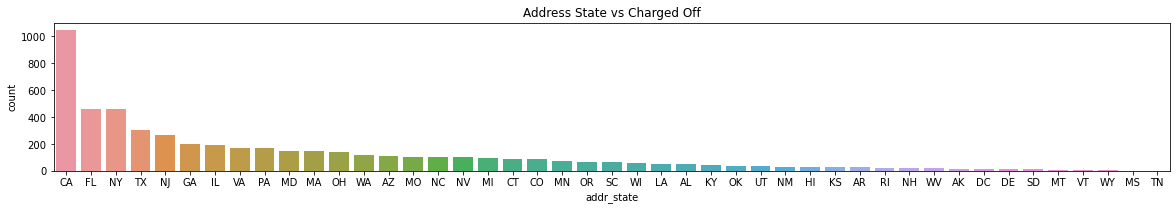

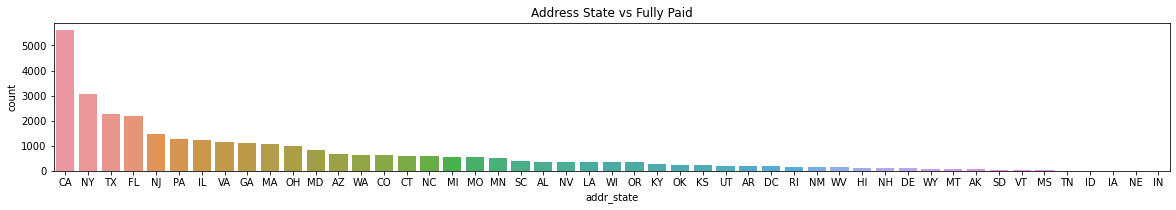

In [154]:
#Address State vs Charged Off in comparison to Address State vs Fully Paid.
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

#### Observations:

Borrowers defaulted in greater numbers in CA, FL, and NY.

## Verfication Status

Text(0.5, 1.0, 'Grade vs Loan status')

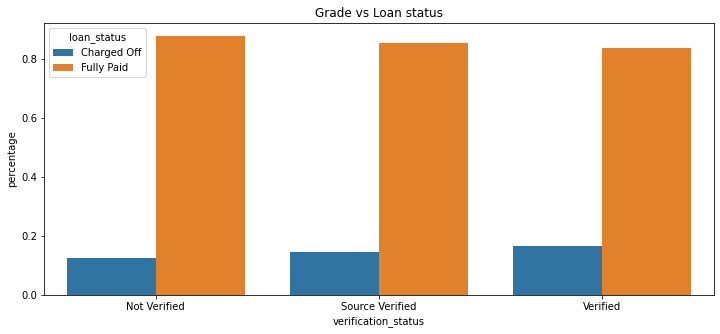

In [155]:
#Grade vs Loan status 
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

#### Observations:

For all varification statuses, there is no significant change in loan charges.

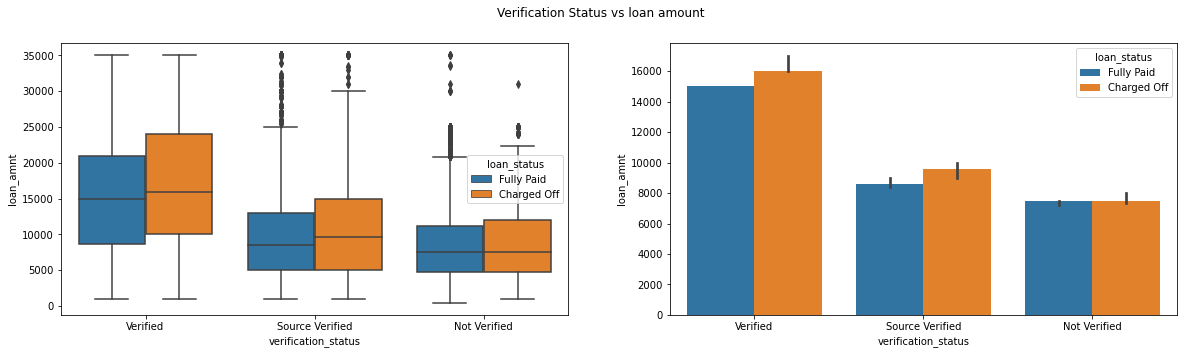

In [156]:
#Verification status vs Loan amount
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

#### Observations: 

In comparison to other loans, verified loans are awarded larger loan amounts.

When a confirmed or source verified loan is defaulted, the loan amount increases slightly.

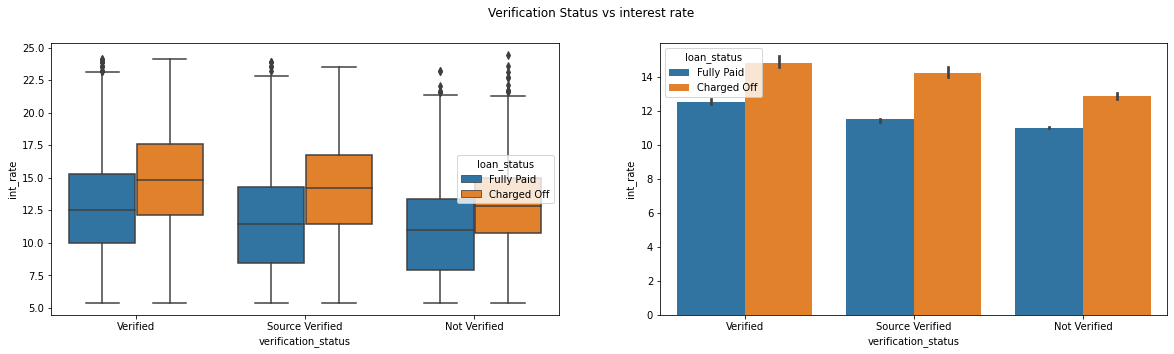

In [158]:
#Verification Status vs interest rate
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

#### Observations:

Regardless of verification status, increasing interest rates result in loan default.

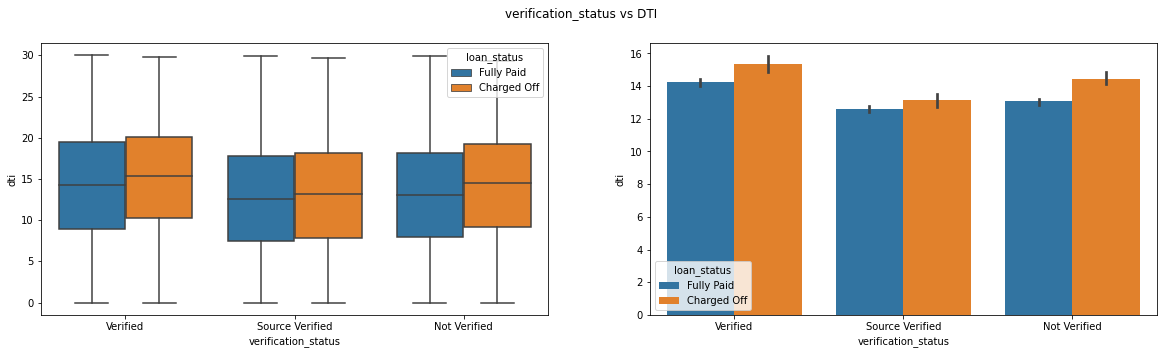

In [159]:
#verification_status vs Debt to income
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

#### Observations:

For all of the verification status categories, the dti mean for defaulted laons has increased slightly.

## Purpose 

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

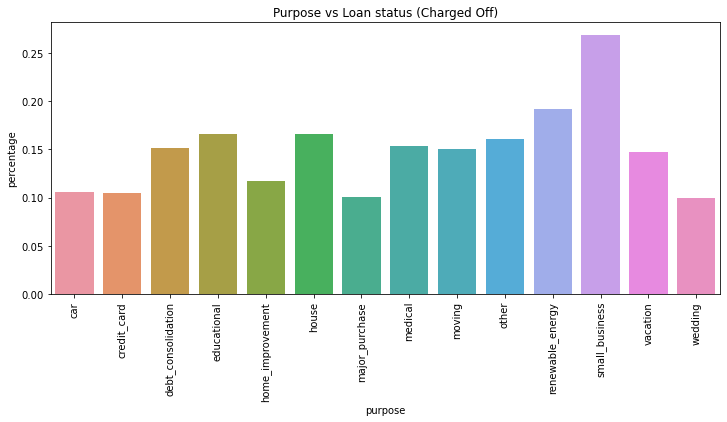

In [160]:
#Purpose vs Loan status (Charged Off)
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

#### Observations: 

Comparatively, charge-offs are higher for small business.

<Figure size 432x288 with 0 Axes>

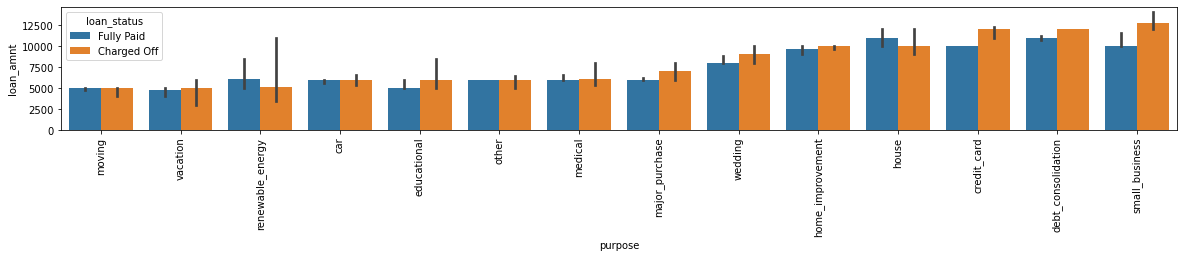

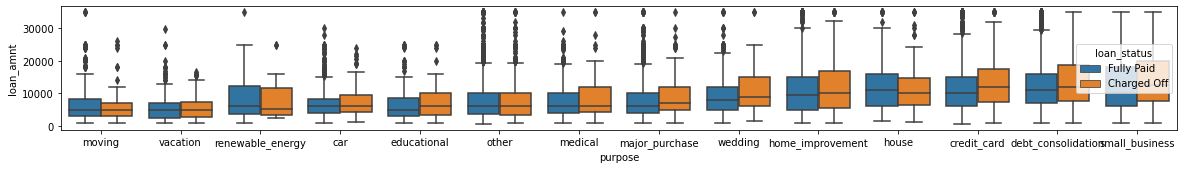

In [162]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
#Purpose vs Loan Amount
plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

#### Observations: 

When the loan amount is also big, there are higher defaults among small businesses.

<Figure size 432x288 with 0 Axes>

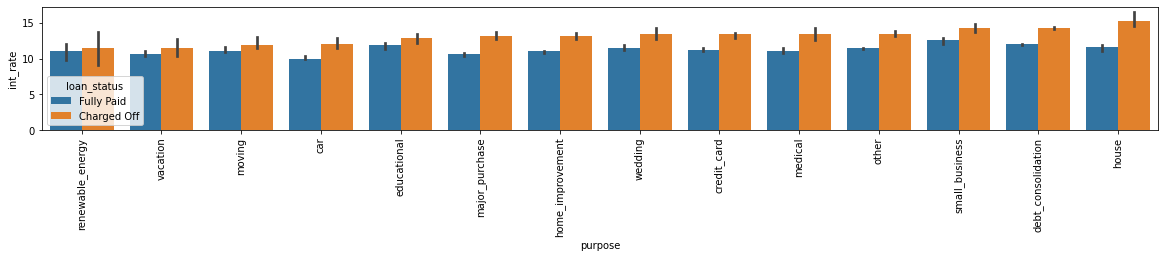

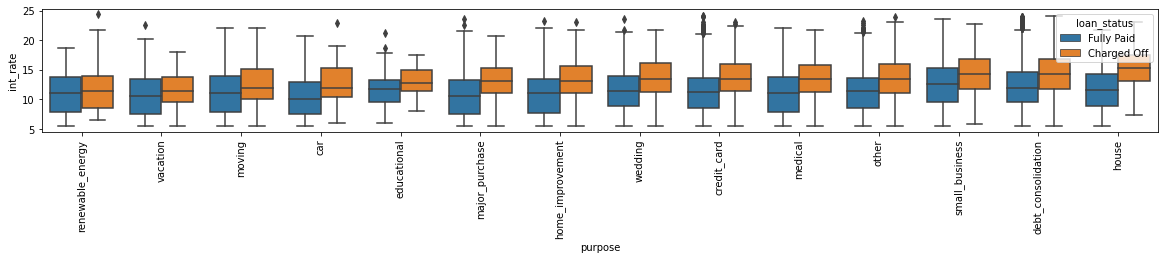

In [163]:
#Purpose vs Interest Rate
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

#### Observations: 

The majority of home loans with high interest rates are defaulted. A similar observation may be made about small businesses and debt consolidation.

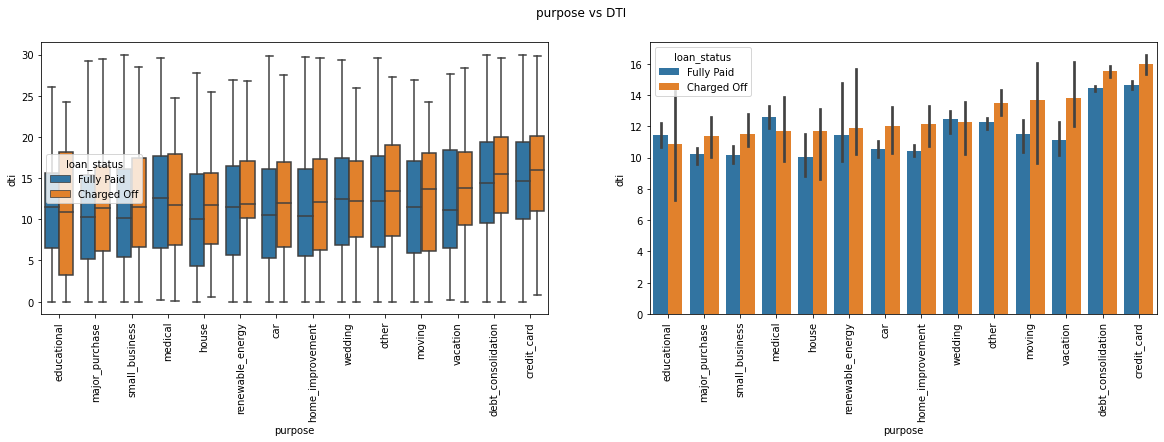

In [164]:
#Purpose vs Debt to income(DTI)
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

#### Observations: 

There was no pattern in the charts that I could see.

### Loan Amount vs Interest Rate  

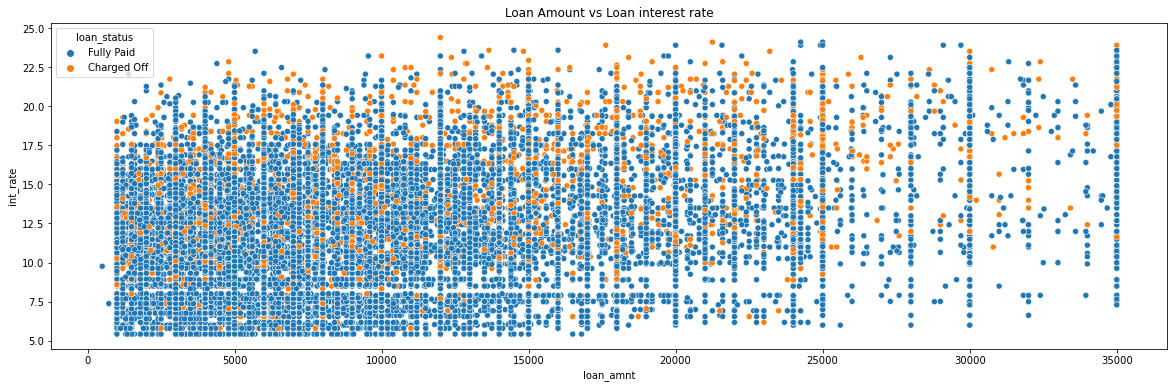

In [165]:
plt.figure(figsize=(20,6))
#For analysing distributions, use a scatter plot.
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

#### Observartions: 

Values are relatively evenly distributed over the space. In the spread, there is no discernible pattern.

## Loan Amount vs Annual income
 

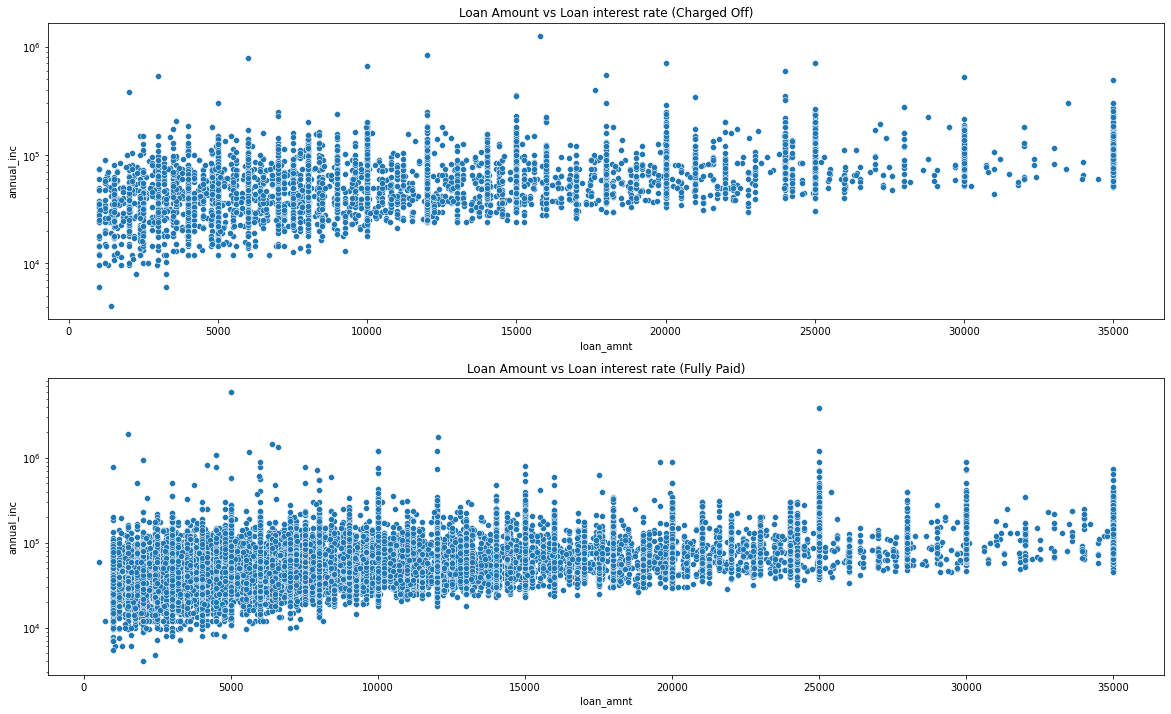

In [167]:
#Loan Amount vs Loan interest rate (Charged Off) in comparison to Loan Amount vs Loan interest rate (Fully Paid). 
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

#### Observations: 

Both fully paid and charged-off loans follow the same pattern when compared to annual income. A line with a much lower slope can be used to fit a linear pattern.

## Loan Amount vs Debt to income(DTI) 

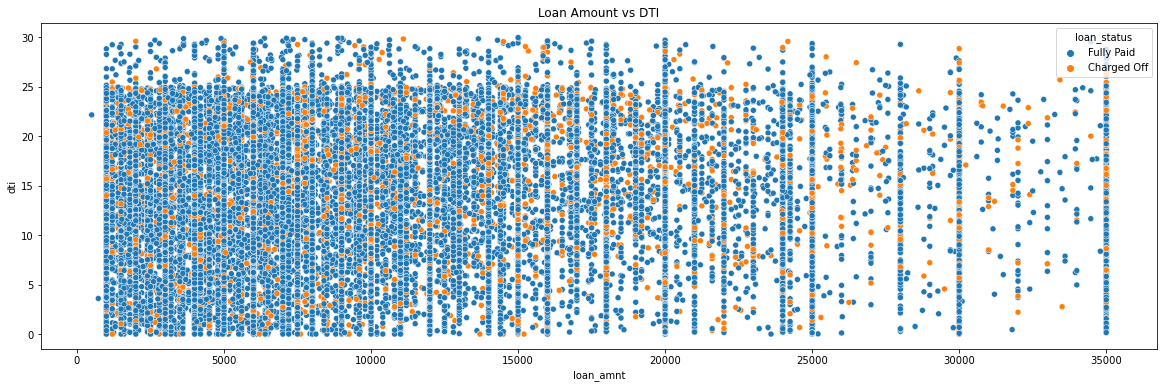

In [168]:
#Loan Amount vs DTI
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

#### Observartions: 

Values are pretty much spread accross all the space. There is not specific pattern found in the spread.



## Interest Rate vs Debt to income(DTI)

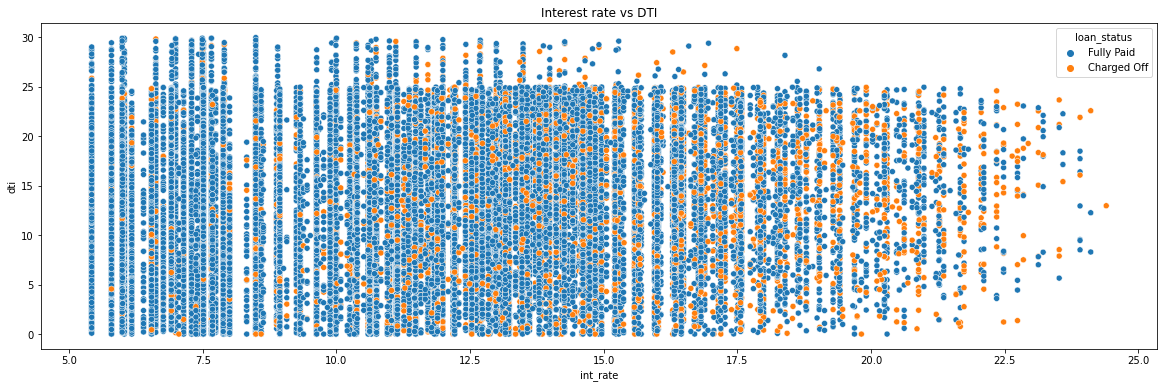

In [169]:
#Interest rate vs DTI
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

#### Observations: 

Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.



## Correlation Matrix 

Let's look for a correlation between our data set's variables/columns.

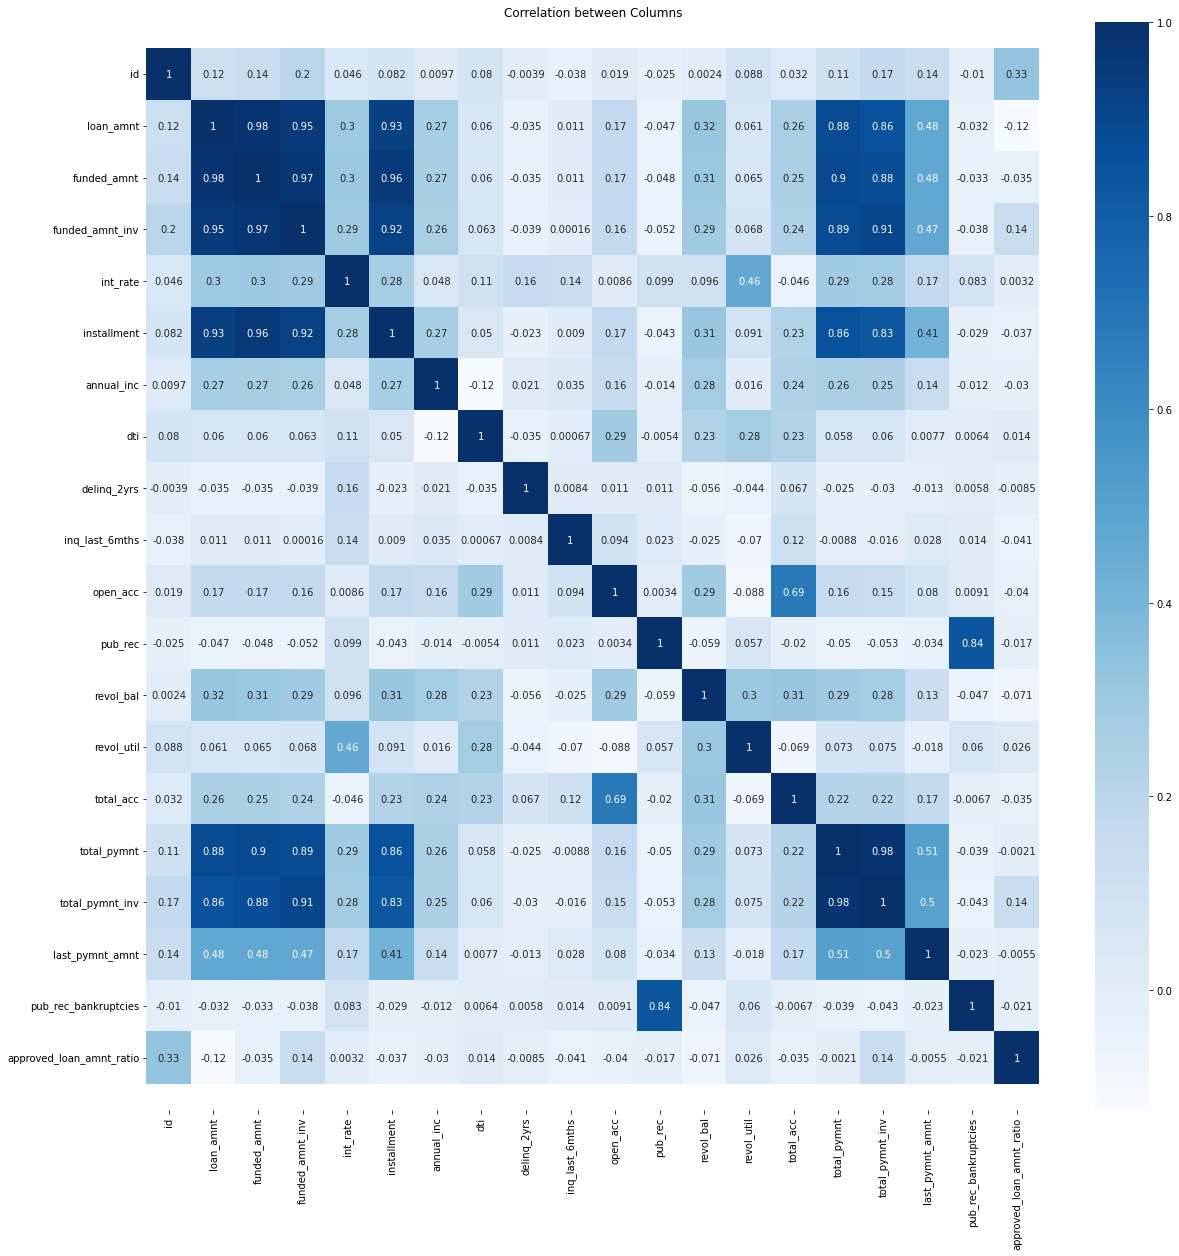

In [170]:
#Looking for correlation matrices
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#Using a heat map to plot correlation matrices
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

#### Observations: 

The public disparaging records column is strongly linked to public bankruptcies records (+ve).

Interest rates are high for consumers who use their credit cards a lot( revol utilisation).